# Project 2 : Supervised Learning - Regression - Cars4U

#### By   : Rakesh Jyothi Krishnan
#### Batch: PGP - ARTIFICIAL INTELLIGENCE & MACHINE LEARNING . PGP-AIML-BA-UTA-Sept'21-A
#### Date : 11/19/2021
---

# Description

## Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

 
## Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.


## Data Dictionary

1. S.No.: Serial number
2. Name: Name of the car which includes brand name and model name
3. Location: Location in which the car is being sold or is available for purchase (cities)
4. Year: Manufacturing year of the car
5. Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
6. Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
7. Transmission: The type of transmission used by the car (Automatic/Manual)
8. Owner: Type of ownership
9. Mileage: The standard mileage offered by the car company in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: The maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
14. Price: The price of the used car in INR Lakhs

---

### 1. Import  Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# to ignore warning messages
import warnings

warnings.filterwarnings("ignore")

# to set background color in plots
sns.set(color_codes=True)

# to print plots inline
%matplotlib inline
# pd.options.display.float_format = '{:,.2f}'.format

<IPython.core.display.Javascript object>

### 2. Load Data

In [2]:
# Read data from csv file using pandas and create DataFrame object
cars4u_data = pd.read_csv("used_cars_data.csv", index_col=0)

<IPython.core.display.Javascript object>

### 3. View Data

In [3]:
# checking number of columns and rows
print(f"There are {cars4u_data.shape[0]} rows and {cars4u_data.shape[1]} columns.")

There are 7253 rows and 13 columns.


<IPython.core.display.Javascript object>

In [4]:
# Check datatypes of each columns
cars4u_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Column names and its data types are listed
2. Nine columns "Name", "Location", "Fuel_Type", "Transmission", "Owner_Type", "Mileage", "Engine", "Power" and  "New_Price" are object datatype. Further analysis is required to confirm whether they are strings or numbers with missing values.
3. Two columns "Year" and "Kilometers_Driven" are integer datatypes
4. Two columns "Seats" and "Price" are float datatypes

In [5]:
# Additional check on data for null values
cars4u_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


<IPython.core.display.Javascript object>

#### Observation : 
1. Row index is from 0 to 7252. Total rows is 7253
2. Column index is from 0 to 12. Total columns is 13
3. There are null values in columns "Mileage", "Engine", "Power", "Seats", "New_Price" and "Price"
4. There are lot of null values in column "New_Price". So it may be better to drop this column
5. The target variable is "Price" and it also contains null values which has to be dropped

In [6]:
# Check head
cars4u_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

In [7]:
# Check tail
cars4u_data.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [8]:
# Check sample
cars4u_data.sample(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
2610,Honda Brio S MT,Kochi,2016,38735,Petrol,Manual,First,19.4 kmpl,1198 CC,86.8 bhp,5.0,NaN,4.92
4250,Toyota Corolla H2,Mumbai,2008,48233,Petrol,Manual,Second,13.4 kmpl,1794 CC,125 bhp,5.0,NaN,1.80
6040,Nissan Micra XV,Delhi,2010,70000,Petrol,Manual,First,18.06 kmpl,1198 CC,75 bhp,5.0,NaN,NaN
4965,Tata Nano STD SE,Jaipur,2012,80000,Petrol,Manual,Second,25.4 kmpl,624 CC,37.5 bhp,4.0,NaN,0.53
5507,Maruti Dzire LDI,Pune,2017,48000,Diesel,Manual,First,28.4 kmpl,1248 CC,73.75 bhp,5.0,7.91 Lakh,6.00


<IPython.core.display.Javascript object>

#### Observation : 
1. Index is Serial Number.
2. Column "Name" has car make, model and some other information.
3. Columns "Location", "Fuel_Type", "Transmission" and "Owner_type" can be categorical.
4. Columns "Year", "Kilometers_Driven", "Seats" and "Price" seems to be numerical.
5. Columns "Mileage", "Engine", "Power" and "New_Price" requires data manipulation in order to convert them into numerical columns.

### 4. Basic Summary

In [9]:
# Check basic summary
cars4u_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

#### Observation : 
1. There are missing values
2. Columns "Location", "Fuel_Type", "Transmission" and "Owner_type" can be categorical.
3. Columns "Year", "Kilometers_Driven", "Seats" and "Price" seems to be numerical.
4. Columns "Mileage", "Engine", "Power" and "New_Price" requires data manipulation in order to convert them into numerical columns.

### 5. Check Duplicates & Clean-up

In [10]:
# Check for duplicate rows
cars4u_data[cars4u_data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [11]:
# Drop duplicate rows
cars4u_data.drop_duplicates(subset=None, keep="first", inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# Again checking number of columns and rows
print(f"There are {cars4u_data.shape[0]} rows and {cars4u_data.shape[1]} columns.")

There are 7252 rows and 13 columns.


<IPython.core.display.Javascript object>

### 6. Check null values

In [13]:
# Check null values and its percentage

def check_null_values():
    return pd.DataFrame(
    {
        "Null values": cars4u_data.isnull().sum(),
        "Percentage of Null values": round(
            (cars4u_data.isnull().sum() / cars4u_data.shape[0] * 100), 2
        ),
        "Data Type": cars4u_data.dtypes,
    }
    )
    
    
check_null_values()


,Null values,Percentage of Null values,Data Type
Name,0,0.00,object
Location,0,0.00,object
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,object
Transmission,0,0.00,object
Owner_Type,0,0.00,object
Mileage,2,0.03,object
Engine,46,0.63,object
Power,175,2.41,object


<IPython.core.display.Javascript object>

#### Observation : 
1. There are null values in columns "Mileage", "Engine", "Power", "Seats", "New_Price" and "Price"
2. Percentage of null values seems to be negligible in columns "Mileage", "Engine", "Power" and "Seats". This can be fixed by missing value imputation.
3. Percentage of null values is very high (86.13%) in column "New_Price". Missing value imputation will not fix this because there is not enough data under this column. This column will not help in model building. So need to drop this column 
4. The target variable (predictor variable) is column "Price". It cannot have null data as it will impact model building. So need to drop these null rows from dataframe.



In [14]:
# Drop column "New_Price" because 86.13% of its data is null
cars4u_data.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [15]:
# Drop null values from target variable column "Price"
cars4u_data.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [16]:
# Check null values and its percentage
check_null_values()

,Null values,Percentage of Null values,Data Type
Name,0,0.00,object
Location,0,0.00,object
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,object
Transmission,0,0.00,object
Owner_Type,0,0.00,object
Mileage,2,0.03,object
Engine,36,0.60,object
Power,143,2.38,object


<IPython.core.display.Javascript object>

### 7. Data Preprocessing

#### A. Data Manipulation - Numerical, Categorical & Strings

In [17]:
# Check the data
cars4u_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<IPython.core.display.Javascript object>

In [18]:
# Check columns "Mileage", "Engine", "Power" and "Price" to get units for data conversion.

numerical_columns = ["Mileage", "Engine", "Power", "Price"]

for colname in numerical_columns:
    string_value = []
    for index in cars4u_data[colname].index:
        if isinstance(cars4u_data[colname][index], str):
            string_value.append(cars4u_data[colname][index].split(" ")[1])
    print(
        "String values in column ", colname, " are ", np.unique(np.array(string_value))
    )

String values in column  Mileage  are  ['km/kg' 'kmpl']
String values in column  Engine  are  ['CC']
String values in column  Power  are  ['bhp']
String values in column  Price  are  []


<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "Mileage", "Engine" and "Power" requires data conversion.
2. Column "Price" looks clean

In [19]:
# Create functions for column data conversion


def correct_Mileage_column(input_value):
    """This function takes in a string from columns 'Mileage' and converts 'km/kg' values to 'kmpl'
    and removes these two strings"""
    if isinstance(input_value, str):  # checks if `input_value` is a string
        if input_value.endswith("km/kg"):
            multiplier = 1.40  # Google says km/kg to kmpl conversion rate as 1.4
            # multiplier = 1
        elif input_value.endswith("kmpl"):
            multiplier = 1
        return round(
            (
                float(input_value.replace("km/kg", "").replace("kmpl", "").strip())
                * multiplier
            ),
            2,
        )
    else:  # return null value because not sure whether numeric is in 'km/kg' or 'kmpl'
        return np.nan


def correct_Engine_column(input_value):
    """This function takes in a string from columns 'Engine' and removes string 'CC'"""
    if isinstance(input_value, str):  # checks if `input_value` is a string
        return round(float(input_value.replace("CC", "")), 2)
    else:  # return null value because not sure whether numeric is in 'km/kg' or 'kmpl'
        return np.nan


def correct_Power_column(input_value):
    """This function takes in a string from columns 'Power' and removes string 'bhp'"""
    if isinstance(input_value, str):  # checks if `input_value` is a string
        return round(float(input_value.replace("bhp", "")), 2)
    else:  # return null value because not sure whether numeric is in 'km/kg' or 'kmpl'
        return np.nan

<IPython.core.display.Javascript object>

In [20]:
# Apply the functions to respective columns for data conversion

col_transforms = {
    "Mileage": correct_Mileage_column,
    "Engine": correct_Engine_column,
    "Power": correct_Power_column,
}


for col, function in col_transforms.items():
    cars4u_data[col] = (
        cars4u_data[col].map(function).replace(0, np.nan)
    )  # replace 0 with numpy nan for null values
    # cars4u_data[col] = cars4u_data[col].map(function)

<IPython.core.display.Javascript object>

In [21]:
# Check data once again
cars4u_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<IPython.core.display.Javascript object>

In [22]:
# Check column data types after data manipulation
cars4u_data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "Mileage", "Engine" and "Power" looks clean. Also, their data types has changed to numerical

#### B. Feature Engineering

In [23]:
# Check data for any feature engineering
cars4u_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


<IPython.core.display.Javascript object>

#### Observation : 
1. Columns "Name" contains car brand, car model and some other information. It will be useful to split this data for model building

In [24]:
# Split car name into car make and car model and store it in two columns
cars4u_data["Car_Brand"] = cars4u_data["Name"].str.split(" ", n=2, expand=True)[0]
cars4u_data["Car_Model"] = cars4u_data["Name"].str.split(" ", n=2, expand=True)[1]

<IPython.core.display.Javascript object>

In [25]:
# Drop column Name
cars4u_data.drop(["Name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [26]:
# Check data
cars4u_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model
S.No.,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


<IPython.core.display.Javascript object>

In [27]:
# Check unique car brand values
cars4u_data["Car_Brand"].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

<IPython.core.display.Javascript object>

#### Observation : 
1. Brand name "Isuzu" seems to be listed twice. 
2. There is no brand name as "Land". It should be "Land Rover".

In [28]:
# Correct car values
cars4u_data.loc[cars4u_data["Car_Brand"] == "ISUZU", "Car_Brand"] = "Isuzu"
cars4u_data.loc[cars4u_data["Car_Brand"] == "Land", "Car_Brand"] = "Land Rover"

<IPython.core.display.Javascript object>

In [29]:
# Check unique car model values
cars4u_data["Car_Model"].unique()

array(['Wagon', 'Creta', 'Jazz', 'Ertiga', 'A4', 'EON', 'Micra', 'Innova',
       'Vento', 'Indica', 'Ciaz', 'City', 'Swift', 'Rover', 'Pajero',
       'Amaze', 'Duster', 'New', '3', 'S', 'A6', 'i20', 'Alto', 'WRV',
       'Corolla', 'Ssangyong', 'Vitara', 'KUV', 'M-Class', 'Polo', 'Nano',
       'Elantra', 'Xcent', 'Thar', 'Grand', 'KWID', 'i10', 'X-Trail',
       'Zen', 'Figo', 'C-Class', 'Cayenne', 'XUV500', 'Terrano', 'Brio',
       'Fiesta', 'Santro', 'Zest', 'Ritz', '5', 'Fortuner', 'Ecosport',
       'Verna', 'GO', 'Omni', 'Etios', 'XF', 'Eeco', 'Civic', 'V40', 'B',
       'Scorpio', 'CR-V', 'SLC', '1', 'Beat', 'Rapid', 'RS5', 'Superb',
       'X5', 'GLC', 'Countryman', 'Optra', 'Lodgy', 'E-Class', 'Baleno',
       'Laura', 'NuvoSport', 'Fabia', 'Indigo', 'Q3', 'Octavia', 'A8',
       'Verito', 'Cooper', 'Santa', 'X1', 'Accent', 'Tucson', 'GLE',
       'A-Star', 'Grande', 'X3', 'EcoSport', 'Q7', 'Jetta', 'GLA',
       'Celerio', 'Sumo', 'Accord', '6', 'Manza', 'Spark', 'Clubman'

<IPython.core.display.Javascript object>

In [30]:
# Create a function to group car brand and car model


def Car_Brand_Model_Group(Brand, Model):
    return str(Brand + " " + Model)

<IPython.core.display.Javascript object>

In [31]:
# apply function and create new column for car brand and model combination

cars4u_data["Car_Brand_Model_Group"] = cars4u_data.apply(
    lambda x: Car_Brand_Model_Group(x["Car_Brand"], x["Car_Model"]), axis=1
)

<IPython.core.display.Javascript object>

In [32]:
# Create bins for kilometers driven for ploting purpose
cars4u_data["Kilometers_Driven_Bin"] = pd.cut(
    cars4u_data["Kilometers_Driven"],
    [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, np.inf],
    labels=[
        "Under 10000",
        "10000 to 20000",
        "20000 to 30000",
        "30000 to 40000",
        "40000 to 50000",
        "50000 to 60000",
        "60000 to 70000",
        "70000 to 80000",
        "80000 to 90000",
        "90000 to 100000",
        "Above 100000",
    ],
)

<IPython.core.display.Javascript object>

In [33]:
# Check the data
cars4u_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Brand_Model_Group,Kilometers_Driven_Bin
S.No.,,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon,Maruti Wagon,70000 to 80000
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,Hyundai Creta,40000 to 50000
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,Honda Jazz,40000 to 50000
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,Maruti Ertiga,80000 to 90000
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,Audi A4,40000 to 50000


<IPython.core.display.Javascript object>

#### C. Column Type Casting

In [34]:
# Check for unique values in every column to decide whether to convert column as "Category"
for colname in cars4u_data.columns:

    if cars4u_data[colname].nunique() <= 300:
        print("Column Name : ", colname)
        print("Column DataType : ", cars4u_data[colname].dtype)
        print("Number of unique values : ", cars4u_data[colname].nunique())
        print("Unique values are : ", cars4u_data[colname].unique())
        if cars4u_data[colname].dtype == "object":
            print("This column type must be converted to category")
        print("\n\n")

Column Name :  Location
Column DataType :  object
Number of unique values :  11
Unique values are :  ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
This column type must be converted to category



Column Name :  Year
Column DataType :  int64
Number of unique values :  22
Unique values are :  [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]



Column Name :  Fuel_Type
Column DataType :  object
Number of unique values :  5
Unique values are :  ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
This column type must be converted to category



Column Name :  Transmission
Column DataType :  object
Number of unique values :  2
Unique values are :  ['Manual' 'Automatic']
This column type must be converted to category



Column Name :  Owner_Type
Column DataType :  object
Number of unique values :  4
Unique values are :  ['First' 'Second' 'Fourth & Above' 'Third']
This co

<IPython.core.display.Javascript object>

In [35]:
# looking at value counts for non-numeric features

num_to_display = 10
for colname in cars4u_data.dtypes[cars4u_data.dtypes == "object"].index:
    val_counts = cars4u_data[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64



Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Name: Car_Brand, dtype: int64
Only displaying first 10 of 30 values.



Swift     353
City      270
i20       247
Verna     170
Innova    164
Grand     156
i10       156
Wagon     154
Polo      151
Alto      143
N

<IPython.core.display.Javascript object>

In [36]:
# Convert columns as "category"
cars4u_data['Location']=cars4u_data['Location'].astype('category')
cars4u_data['Fuel_Type']=cars4u_data['Fuel_Type'].astype('category')
cars4u_data['Transmission']=cars4u_data['Transmission'].astype('category')
cars4u_data['Owner_Type']=cars4u_data['Owner_Type'].astype('category')
#cars4u_data['Seats']=cars4u_data['Seats'].astype('int64')
cars4u_data['Car_Brand']=cars4u_data['Car_Brand'].astype('category')
cars4u_data['Car_Model']=cars4u_data['Car_Model'].astype('category')
cars4u_data['Car_Brand_Model_Group']=cars4u_data['Car_Brand_Model_Group'].astype('category')


<IPython.core.display.Javascript object>

In [37]:
# Check column data types
cars4u_data.dtypes

Location                 category
Year                        int64
Kilometers_Driven           int64
Fuel_Type                category
Transmission             category
Owner_Type               category
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                     float64
Car_Brand                category
Car_Model                category
Car_Brand_Model_Group    category
Kilometers_Driven_Bin    category
dtype: object

<IPython.core.display.Javascript object>

### 8. Univariate Analysis - Numerical Variables

In [38]:
# function to plot a boxplot and a histogram along the same scale.


def hist_boxplot(data, column, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(data=data, x=column, ax=ax_box2, showmeans=True, color="Lightblue")
    sns.histplot(
        data=data, x=column, kde=kde, ax=ax_hist2, bins=bins, palette="Blues"
    ) if bins else sns.histplot(data=data, x=column, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[column].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[column].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [39]:
# Check datatypes of columns and apply above function to numerical columns
cars4u_data.dtypes

Location                 category
Year                        int64
Kilometers_Driven           int64
Fuel_Type                category
Transmission             category
Owner_Type               category
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                     float64
Car_Brand                category
Car_Model                category
Car_Brand_Model_Group    category
Kilometers_Driven_Bin    category
dtype: object

<IPython.core.display.Javascript object>

#### A. Univariate Analysis - Column "Year"

In [40]:
# Basic summary
cars4u_data[["Year"]].describe()

,Year
count,6019.000000
mean,2013.358199
std,3.269742
min,1998.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2019.000000


<IPython.core.display.Javascript object>

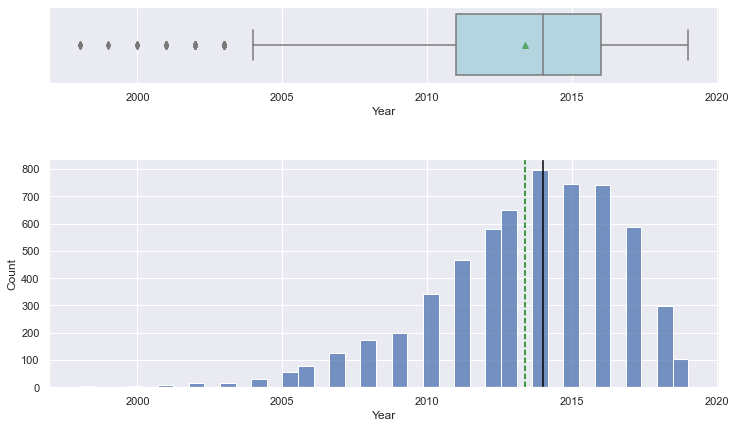

<IPython.core.display.Javascript object>

In [41]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Year")

#### Observation of  column "Year": 
1. It looks like a normal distribution.
2. It is left skewed
3. It has outliers
4. Mean and Median are not same
5. Mean is 2013 and median is 2014

#### B. Univariate Analysis - Column "Kilometers_Driven"

In [42]:
# Basic summary
cars4u_data[["Kilometers_Driven"]].describe()

,Kilometers_Driven
count,6.019000e+03
mean,5.873838e+04
std,9.126884e+04
min,1.710000e+02
25%,3.400000e+04
50%,5.300000e+04
75%,7.300000e+04
max,6.500000e+06


<IPython.core.display.Javascript object>

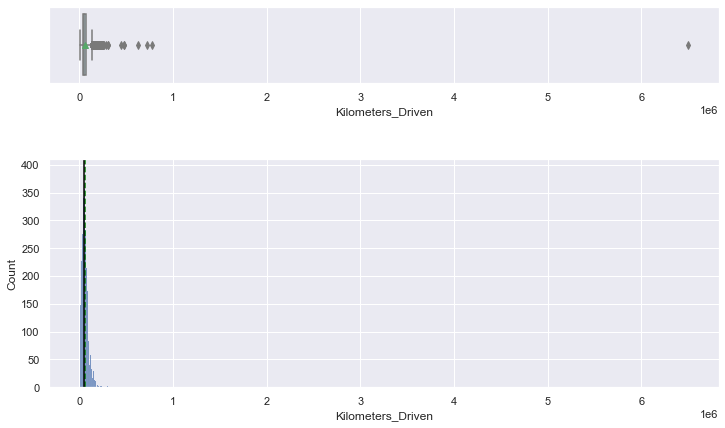

<IPython.core.display.Javascript object>

In [43]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Kilometers_Driven")

#### Observation of  column "Kilometers_Driven": 
1. It doesn't look like a normal distribution.
2. It is heavily right skewed
3. It has outliers
4. It requires log transformation

In [44]:
# Create new column for log transformed data
cars4u_data["Kilometers_Driven_Log"] = np.log(cars4u_data["Kilometers_Driven"])

<IPython.core.display.Javascript object>

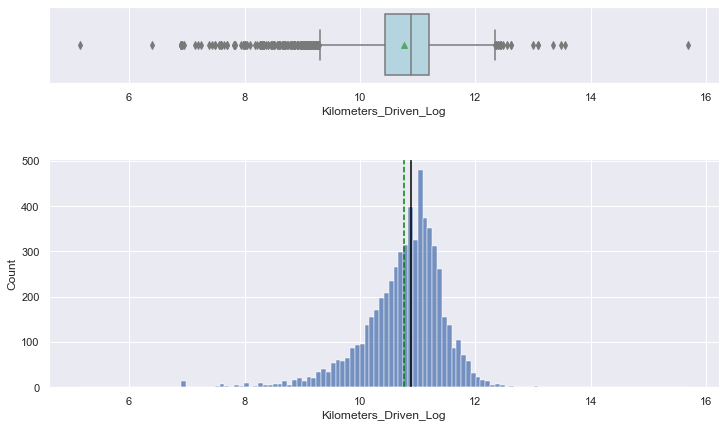

<IPython.core.display.Javascript object>

In [45]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Kilometers_Driven_Log")

#### Observation of  column "Kilometers_Driven_Log": 
1. It looks like a normal distribution.
2. It has outliers

#### C. Univariate Analysis - Column "Mileage"

In [46]:
# Basic summary
cars4u_data[["Mileage"]].describe()

,Mileage
count,5949.000000
mean,18.450998
std,4.498362
min,6.400000
25%,15.300000
50%,18.230000
75%,21.100000
max,46.960000


<IPython.core.display.Javascript object>

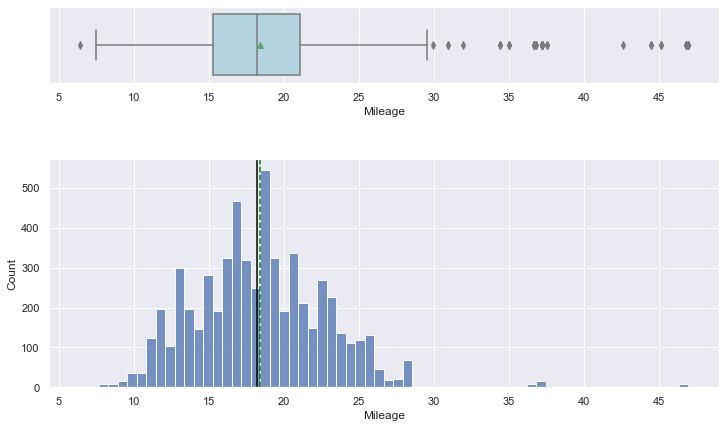

<IPython.core.display.Javascript object>

In [47]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Mileage")

#### Observation of  column "Mileage": 
1. It looks like a normal distribution.
2. It is not much skewed
3. It has outliers
4. Mean and Median are almost same
5. Mean is 18.45 and median is 18.23

#### D. Univariate Analysis - Column "Engine"

In [48]:
# Basic summary
cars4u_data[["Engine"]].describe()

,Engine
count,5983.000000
mean,1621.276450
std,601.355233
min,72.000000
25%,1198.000000
50%,1493.000000
75%,1984.000000
max,5998.000000


<IPython.core.display.Javascript object>

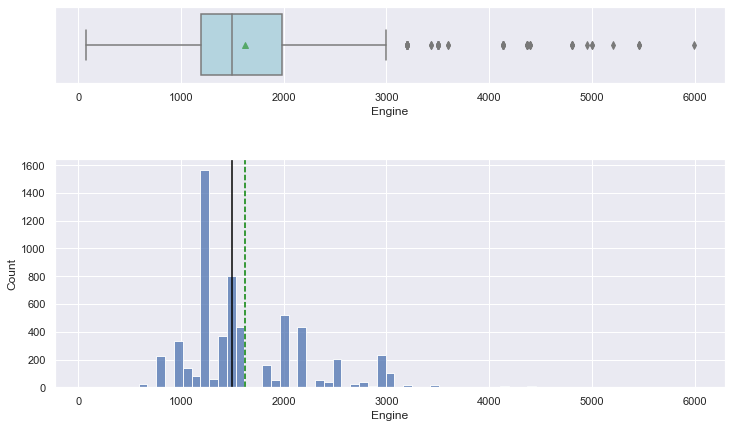

<IPython.core.display.Javascript object>

In [49]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Engine")

#### Observation of  column "Engine": 
1. It looks like a normal distribution.
2. It is slightly right skewed
3. It has outliers
4. Mean and Median are close
5. Mean is 1621.27 and median is 1493.00

#### E. Univariate Analysis - Column "Power"

In [50]:
# Basic summary
cars4u_data[["Power"]].describe()

,Power
count,5876.000000
mean,113.253051
std,53.874957
min,34.200000
25%,75.000000
50%,97.700000
75%,138.100000
max,560.000000


<IPython.core.display.Javascript object>

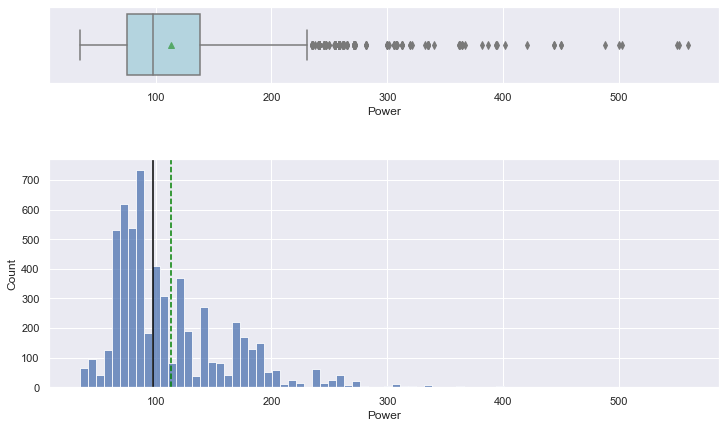

<IPython.core.display.Javascript object>

In [51]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Power")

#### Observation of  column "Power": 
1. It looks like a normal distribution.
2. It is heavily right skewed
3. It has outliers
4. Mean and Median are not at all close
5. Mean is 113.25 and median is 97.70

#### F. Univariate Analysis - Column "Seats"

In [52]:
# Basic summary
cars4u_data[["Seats"]].describe()

,Seats
count,5977.000000
mean,5.278735
std,0.808840
min,0.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,10.000000


<IPython.core.display.Javascript object>

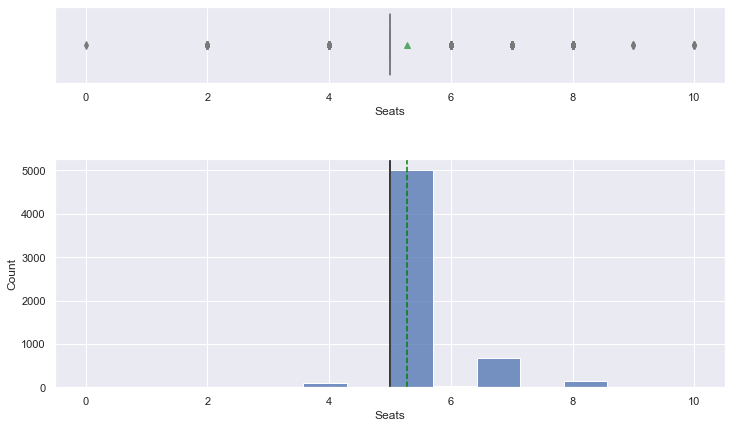

<IPython.core.display.Javascript object>

In [53]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Seats")

#### Observation of  column "Seats": 
1. It looks like a normal distribution.
2. It has outliers
4. Mean and Median are very close
5. Mean is 5.27 and median is 5

#### G. Univariate Analysis - Column "Price"

In [54]:
# Basic summary
cars4u_data[["Price"]].describe()

,Price
count,6019.000000
mean,9.479468
std,11.187917
min,0.440000
25%,3.500000
50%,5.640000
75%,9.950000
max,160.000000


<IPython.core.display.Javascript object>

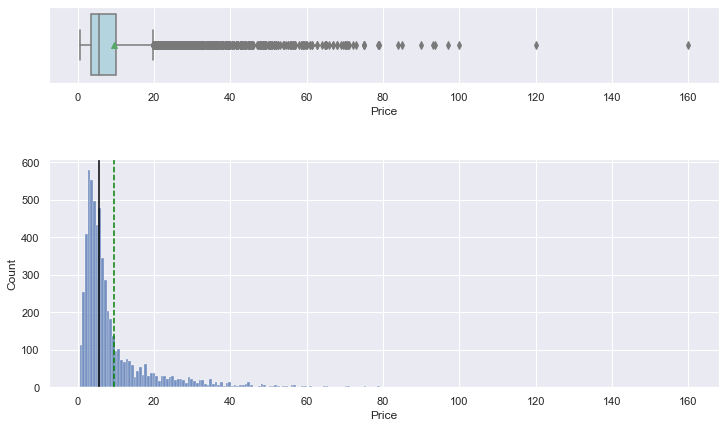

<IPython.core.display.Javascript object>

In [55]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Price")

#### Observation of  column "Price": 
1. It doesn't look like a normal distribution.
2. It is heavily right skewed
3. It has outliers
4. Mean and Median are not close
5. Mean is 9.47 and median is 5.64
6. It requires log transformation. **One of the assumptions of a linear regression model is "Normality" (For any fixed value of X, Y is normally distributed). Since "Price" is heavily right skewed, I am applying log transformation. One important point is to apply inverse function of log transformation for predicted values to get actual predicted target value.**

In [56]:
cars4u_data["Price_Log"] = np.log(cars4u_data["Price"])

<IPython.core.display.Javascript object>

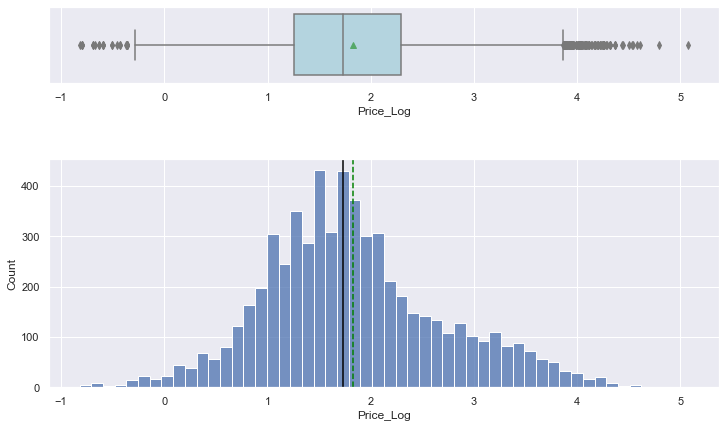

<IPython.core.display.Javascript object>

In [57]:
# Visualize data through plot
hist_boxplot(cars4u_data, "Price_Log")

#### Observation of  column "Price_Log": 
1. It looks like a normal distribution.
2. It has outliers

### 9. Univariate Analysis - Categorical Variables

In [58]:
# Check data again
cars4u_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Brand_Model_Group,Kilometers_Driven_Bin,Kilometers_Driven_Log,Price_Log
S.No.,,,,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon,Maruti Wagon,70000 to 80000,11.184421,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,Hyundai Creta,40000 to 50000,10.621327,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,Honda Jazz,40000 to 50000,10.736397,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,Maruti Ertiga,80000 to 90000,11.373663,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,Audi A4,40000 to 50000,10.613246,2.875822


<IPython.core.display.Javascript object>

In [59]:
# function to create labeled barplots


def labeled_barplot(data, column, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[column])  # length of the column
    count = data[column].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=45, fontsize=13)
    ax = sns.countplot(
        data=data,
        x=column,
        palette="Paired",
        order=data[column].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

<IPython.core.display.Javascript object>

In [60]:
# Get categorical columns
cars4u_data.dtypes[cars4u_data.dtypes == "category"]

Location                 category
Fuel_Type                category
Transmission             category
Owner_Type               category
Car_Brand                category
Car_Model                category
Car_Brand_Model_Group    category
Kilometers_Driven_Bin    category
dtype: object

<IPython.core.display.Javascript object>

#### A. Univariate Analysis - Column "Location"

In [61]:
# Basic summary
cars4u_data[["Location"]].describe()

,Location
count,6019
unique,11
top,Mumbai
freq,790


<IPython.core.display.Javascript object>

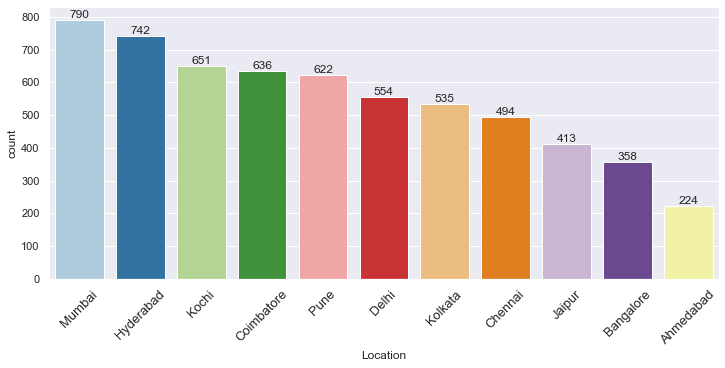

<IPython.core.display.Javascript object>

In [62]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Location")

#### Observation of  column "Location": 
1. Mumbai has most car sales with 790.
2. Hyderabad and Kochi are in 2nd and 3rd place with 742 and 651 respectively

#### B. Univariate Analysis - Column "Fuel_Type"

In [63]:
# Basic summary
cars4u_data[["Fuel_Type"]].describe()

,Fuel_Type
count,6019
unique,5
top,Diesel
freq,3205


<IPython.core.display.Javascript object>

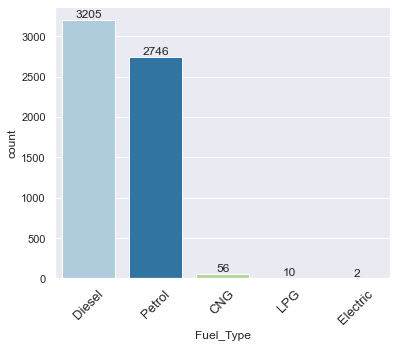

<IPython.core.display.Javascript object>

In [64]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Fuel_Type")

#### Observation of  column "Fuel_Type": 
1. Diesel cars are sold most with 3205 sales.
2. Petrol cars are second most sold with 2746 sales.
3. CNG, LPG and Electric car sales are very less.

#### C. Univariate Analysis - Column "Transmission"

In [65]:
# Basic summary
cars4u_data[["Transmission"]].describe()

,Transmission
count,6019
unique,2
top,Manual
freq,4299


<IPython.core.display.Javascript object>

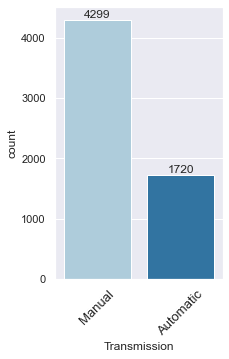

<IPython.core.display.Javascript object>

In [66]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Transmission")

#### Observation of  column "Transmission": 
1. There are only two categories - Manual and Automatic.
2. Manual cars are sold the most with 4299 sales. Automatic cars are next with 1720 sales

#### D. Univariate Analysis - Column "Owner_Type"

In [67]:
# Basic summary
cars4u_data[["Owner_Type"]].describe()

,Owner_Type
count,6019
unique,4
top,First
freq,4929


<IPython.core.display.Javascript object>

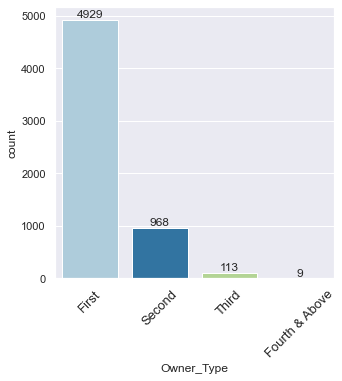

<IPython.core.display.Javascript object>

In [68]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Owner_Type")

#### Observation of  column "Owner_Type": 
1. There are four categories - First, Second, Third and Fourth & Above.
2. First cars are sold the most with 4929 sales. Then comes "Second", "Third" and "Fourth & Above" with 968, 113 and 9 car sales respectively.

#### E. Univariate Analysis - Column "Car_Brand"

In [69]:
# Basic summary
cars4u_data[["Car_Brand"]].describe()

,Car_Brand
count,6019
unique,30
top,Maruti
freq,1211


<IPython.core.display.Javascript object>

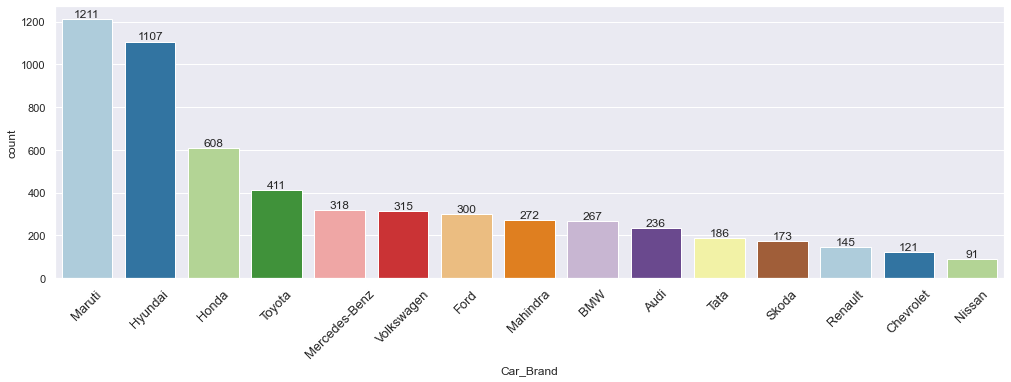

<IPython.core.display.Javascript object>

In [70]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Car_Brand", n=15)

#### Observation of  column "Car_Brand": 
1. Only top 15 car makers are shown in above plot.
2. Maruti is most sold car with 1211 sales. Followed by Hyundai, Honda, Toyota etc with 1107, 608, 411 respectively.

#### F. Univariate Analysis - Column "Car_Model"

In [71]:
# Basic summary
cars4u_data[["Car_Model"]].describe()

,Car_Model
count,6019
unique,212
top,Swift
freq,353


<IPython.core.display.Javascript object>

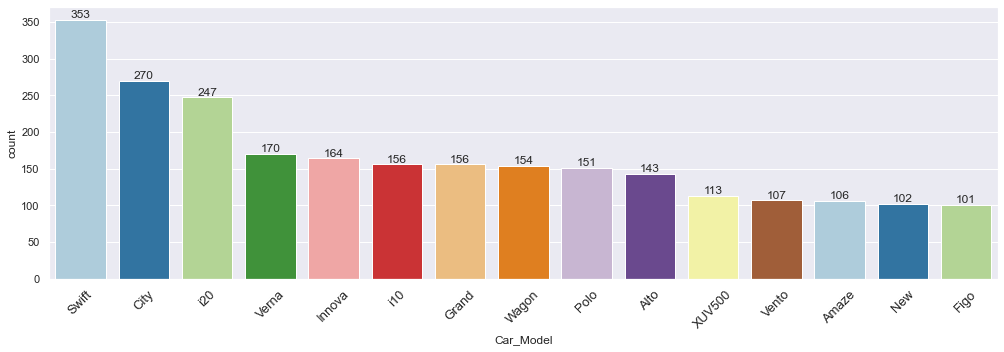

<IPython.core.display.Javascript object>

In [72]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Car_Model", n=15)

#### Observation of  column "Car_Model": 
1. Only top 15 car models are shown in above plot.
2. Swift is most sold car. Followed by City, i20, Verna etc.

#### G. Univariate Analysis - Column "Car_Brand_Model_Group"

In [73]:
# Basic summary
cars4u_data[["Car_Brand_Model_Group"]].describe()

,Car_Brand_Model_Group
count,6019
unique,216
top,Maruti Swift
freq,353


<IPython.core.display.Javascript object>

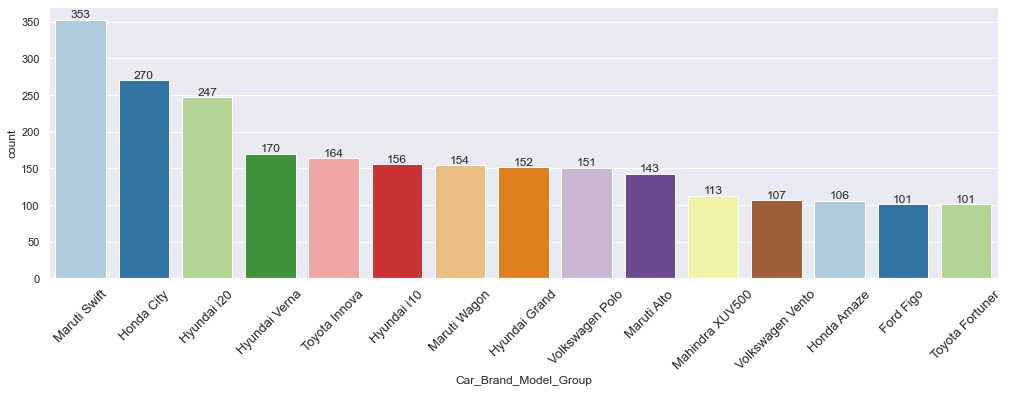

<IPython.core.display.Javascript object>

In [74]:
# Visualize data through plot
labeled_barplot(cars4u_data, "Car_Brand_Model_Group", n=15)

#### Observation of  column "Car_Brand_Model_Group": 
1. Only top 15 car models are shown in above plot.
2. Maruti Swift is most sold car with 353 sales. Followed by Honda City, Hyundai i20, Hyundai Verna etc with 270,247,170 respectively.

### 10. Bivariate Analysis - Price vs other variables

In [75]:
# Get column and its datatypes for bivariate analysis
cars4u_data.dtypes

Location                 category
Year                        int64
Kilometers_Driven           int64
Fuel_Type                category
Transmission             category
Owner_Type               category
Mileage                   float64
Engine                    float64
Power                     float64
Seats                     float64
Price                     float64
Car_Brand                category
Car_Model                category
Car_Brand_Model_Group    category
Kilometers_Driven_Bin    category
Kilometers_Driven_Log     float64
Price_Log                 float64
dtype: object

<IPython.core.display.Javascript object>

#### A. Location vs Price

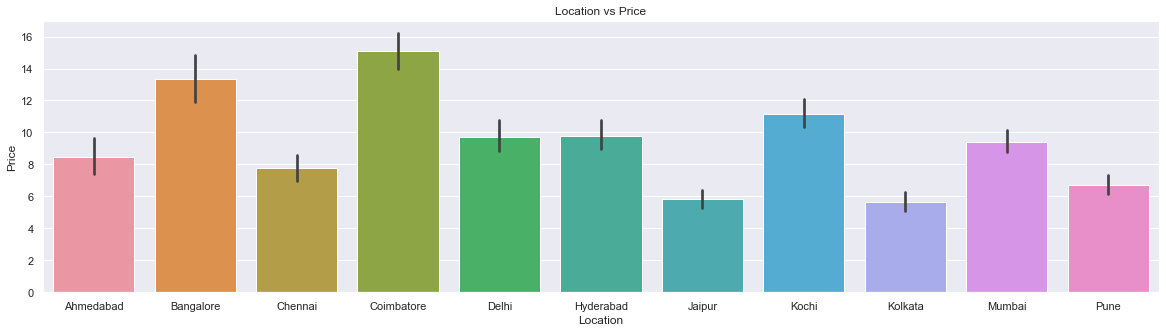

<IPython.core.display.Javascript object>

In [76]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Location", y="Price", data=cars4u_data).set(title="Location vs Price")
plt.show()

#### Observation  "Location vs Price": 
1. Coimbatore has highest car price sales on average. Followed by Bangalore and Kochi.

#### B. Year vs Price

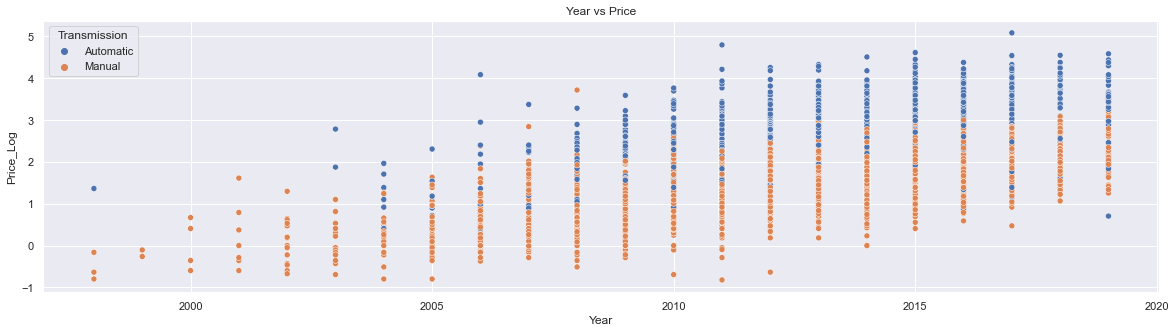

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Year", y="Price_Log", data=cars4u_data, hue="Transmission").set(
    title="Year vs Price"
)
plt.show()

#### Observation  "Year vs Price": 
1. As year becomes in past, price of car decreases. Shows newer cars have higher prices. Looks like customers prefer newer cars. 

#### C. Kilometers Driven vs Price

<function matplotlib.pyplot.show(close=None, block=None)>

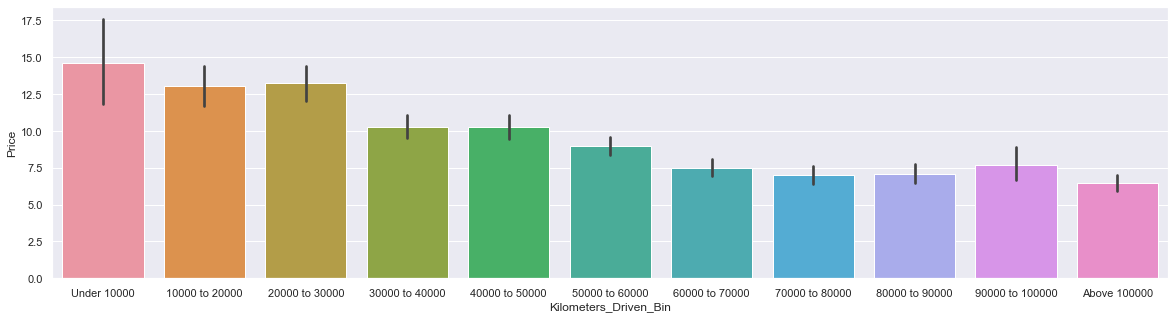

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Kilometers_Driven_Bin", y="Price", data=cars4u_data)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

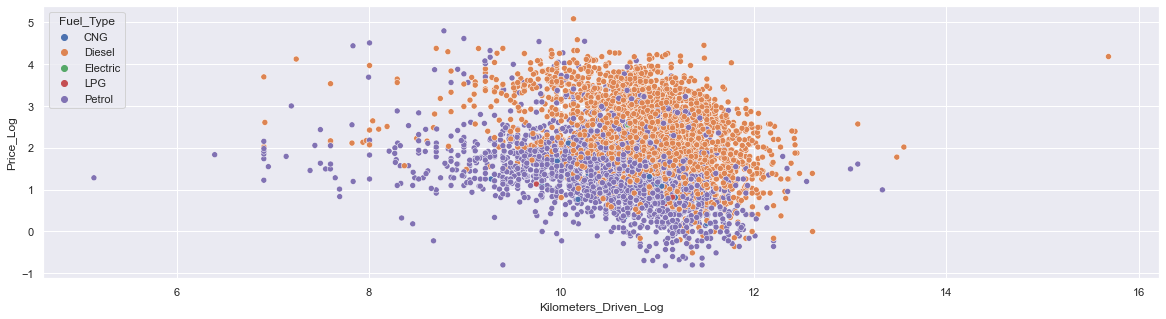

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(20, 5))
sns.scatterplot(
    x="Kilometers_Driven_Log", y="Price_Log", data=cars4u_data, hue="Fuel_Type"
)
plt.show

#### Observation  "Kilometers Driven vs Price": 
1. Most of the car were driven for less than 10000 kms.
2. Price trends to drop when kilometers driven increases. This downward trend is distinguishable based on Fuel Type. Shows customers prefer cars driven less.

#### D. Fuel Type vs Price

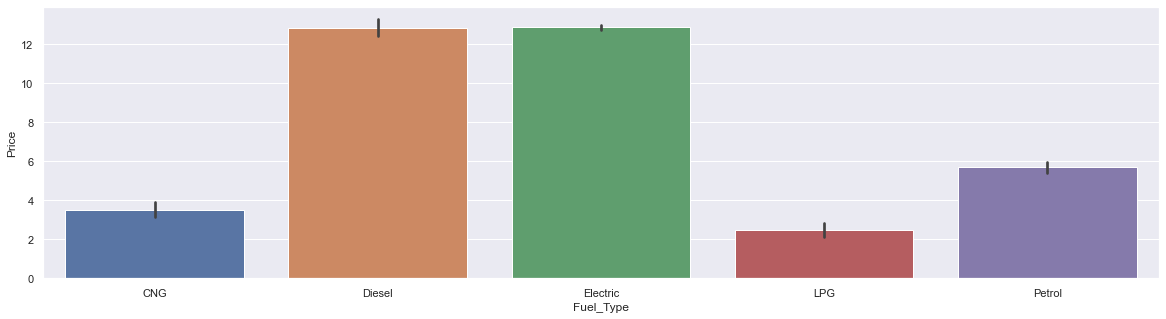

<IPython.core.display.Javascript object>

In [80]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Fuel_Type", y="Price", data=cars4u_data)
plt.show()

#### Observation  "Fuel Type vs Price": 
1. Average highest price is for "Diesel" and "Electric" cars. This shows customers prefer cars based on its fuel consumption expense. Both Diesel and Electric cars cost less fuel expense compared to other (Especially, "Petrol" is costlier than "Diesel" and "Electric").

#### E. Transmission vs Price

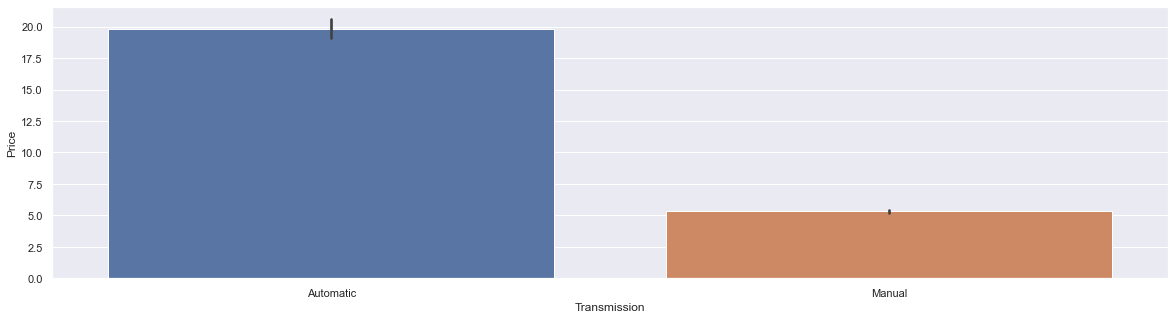

<IPython.core.display.Javascript object>

In [81]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Transmission", y="Price", data=cars4u_data)
plt.show()

#### Observation  "Transmission vs Price": 
1. "Automatic" cars are priced higher than "Manual" cars. Its because automatic cars are more comfortable to drive compared to manual ones.

#### E. Owner Type vs Price

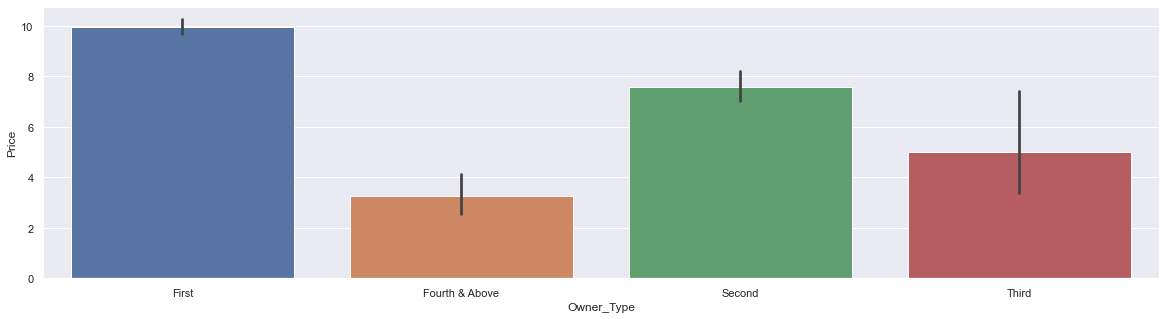

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(20, 5))
sns.barplot(x="Owner_Type", y="Price", data=cars4u_data)
plt.show()

#### Observation  "Owner Type vs Price": 
1. "First" owner type cars are priced higher. Then comes "Second", "Third" and "Fourth & Above". Probably because customers prefer less number of previous owners for cars. 

#### F. Mileage vs Price

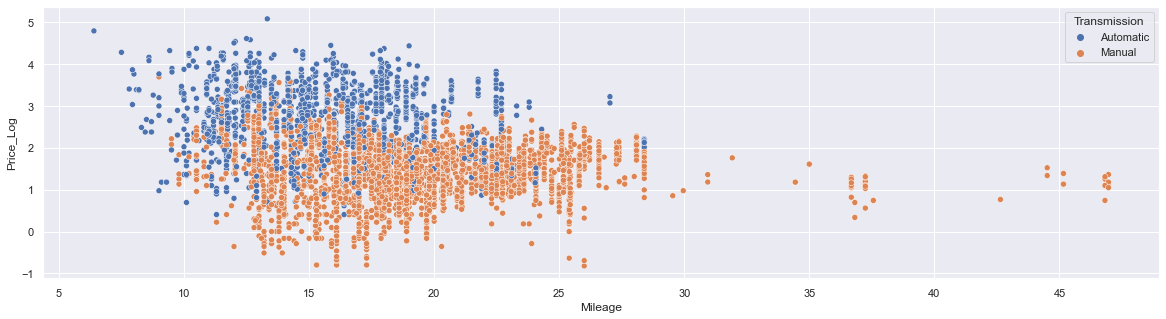

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Mileage", y="Price_Log", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Mileage vs Price": 
1. Looks like Mileage doesnt influence price much

#### G. Engine vs Price

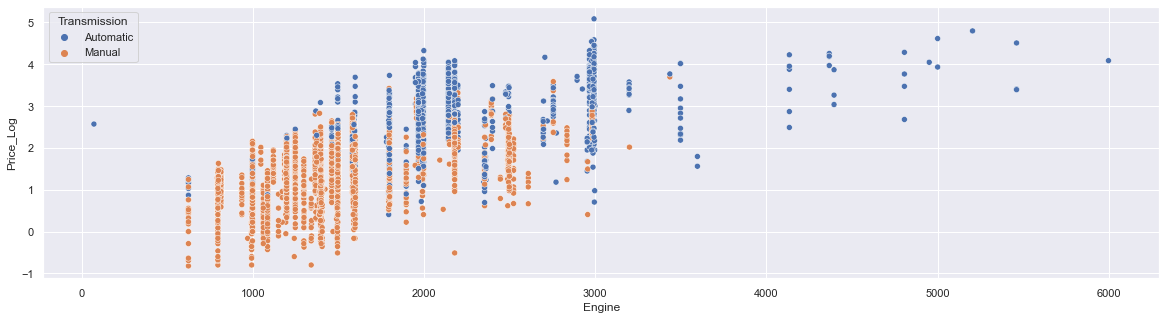

<IPython.core.display.Javascript object>

In [84]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Engine", y="Price_Log", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Engine vs Price": 
1. As engine size increases price also increases. 
2. "Automatic" cars has higher engine capacity and are priced higher than "Manual" cars.

#### H. Power vs Price

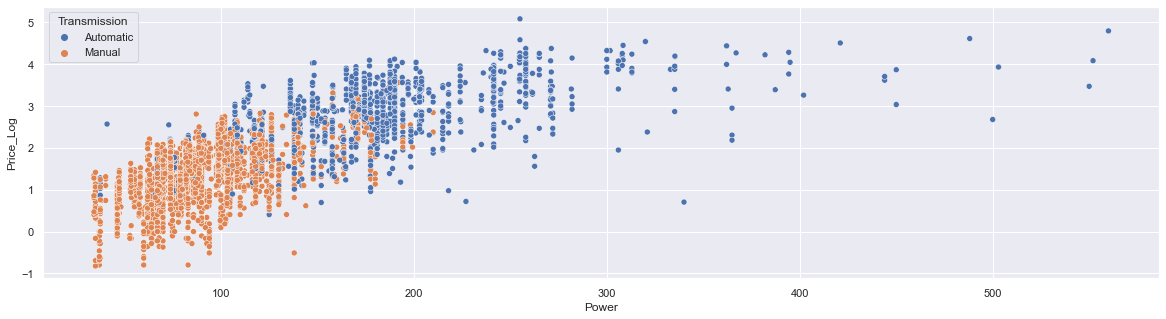

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Power", y="Price_Log", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Power vs Price": 
1. As power increases price also increases. 
2. "Automatic" cars has higher power and are priced higher than "Manual" cars.

#### I. Seats vs Price

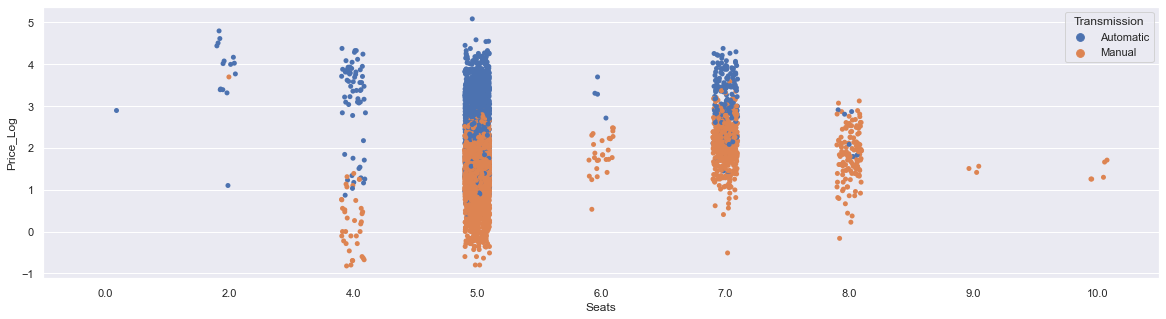

<IPython.core.display.Javascript object>

In [86]:
plt.figure(figsize=(20, 5))
sns.stripplot(x="Seats", y="Price_Log", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Seats vs Price": 
1. There is high density of cars with seats "5" and "7". Probably they are hatchbacks, sedans and SUV's.
2. Cars with "2" seats seems to be higher priced. Probably they are sports cars.

#### J. Car Brand vs Price

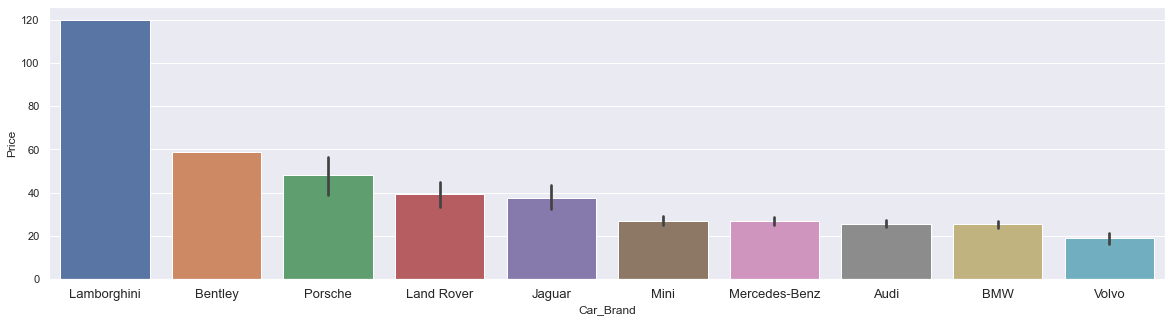

<IPython.core.display.Javascript object>

In [87]:
group_order = (
    cars4u_data.groupby("Car_Brand")["Price"]
    .mean()
    .sort_values(ascending=False)
    .index[:10]
)

plt.figure(figsize=(20, 5))
sns.barplot(x="Car_Brand", y="Price", data=cars4u_data, order=group_order)
plt.xticks(fontsize=13)
plt.show()

#### Observation  "Car Brand vs Price": 
1. "Lamborghini", "Bentley", "Porsche" etc seems to be higher priced car brands.

#### H. Car Model vs Price

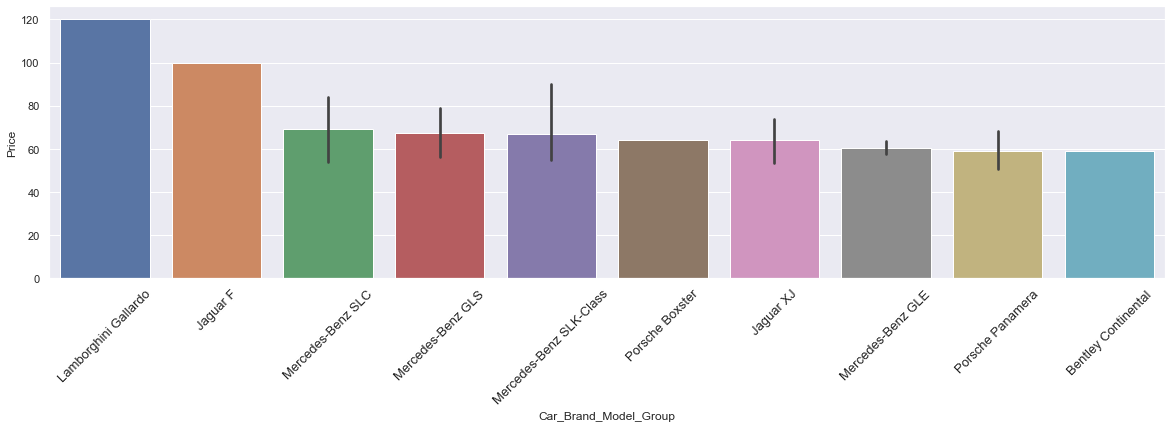

<IPython.core.display.Javascript object>

In [88]:
group_order = (
    cars4u_data.groupby("Car_Brand_Model_Group")["Price"]
    .mean()
    .sort_values(ascending=False)
    .index[:10]
)

plt.figure(figsize=(20, 5))
sns.barplot(x="Car_Brand_Model_Group", y="Price", data=cars4u_data, order=group_order)
plt.xticks(rotation=45, fontsize=13)
plt.show()

#### Observation  "Car Model vs Price": 
1. "Lamborghini Gallardo", "Jaguar F", "Mercedes-Benz SLC" etc seems to be higher priced car models.

### 10. Multivariate Analysis

In [89]:
# Check data
cars4u_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Brand,Car_Model,Car_Brand_Model_Group,Kilometers_Driven_Bin,Kilometers_Driven_Log,Price_Log
S.No.,,,,,,,,,,,,,,,,,
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,1.75,Maruti,Wagon,Maruti Wagon,70000 to 80000,11.184421,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,Hyundai Creta,40000 to 50000,10.621327,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,Honda Jazz,40000 to 50000,10.736397,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,Maruti Ertiga,80000 to 90000,11.373663,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,Audi A4,40000 to 50000,10.613246,2.875822


<IPython.core.display.Javascript object>

In [90]:
# Get correlation between each numerical feature
cars4u_data.corr()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Kilometers_Driven_Log,Price_Log
Year,1.000000,-0.173048,0.277082,-0.052197,0.014525,0.012333,0.305327,-0.498021,0.504969
Kilometers_Driven,-0.173048,1.000000,-0.060269,0.091068,0.033503,0.083113,-0.011493,0.417725,-0.047809
Mileage,0.277082,-0.060269,1.000000,-0.623118,-0.536764,-0.329291,-0.322698,-0.119641,-0.300464
Engine,-0.052197,0.091068,-0.623118,1.000000,0.866185,0.393337,0.658354,0.148948,0.686766
Power,0.014525,0.033503,-0.536764,0.866185,1.000000,0.101562,0.772566,0.016959,0.768983
Seats,0.012333,0.083113,-0.329291,0.393337,0.101562,1.000000,0.052225,0.190907,0.163700
Price,0.305327,-0.011493,-0.322698,0.658354,0.772566,0.052225,1.000000,-0.185937,0.850189
Kilometers_Driven_Log,-0.498021,0.417725,-0.119641,0.148948,0.016959,0.190907,-0.185937,1.000000,-0.204300
Price_Log,0.504969,-0.047809,-0.300464,0.686766,0.768983,0.163700,0.850189,-0.204300,1.000000


<IPython.core.display.Javascript object>

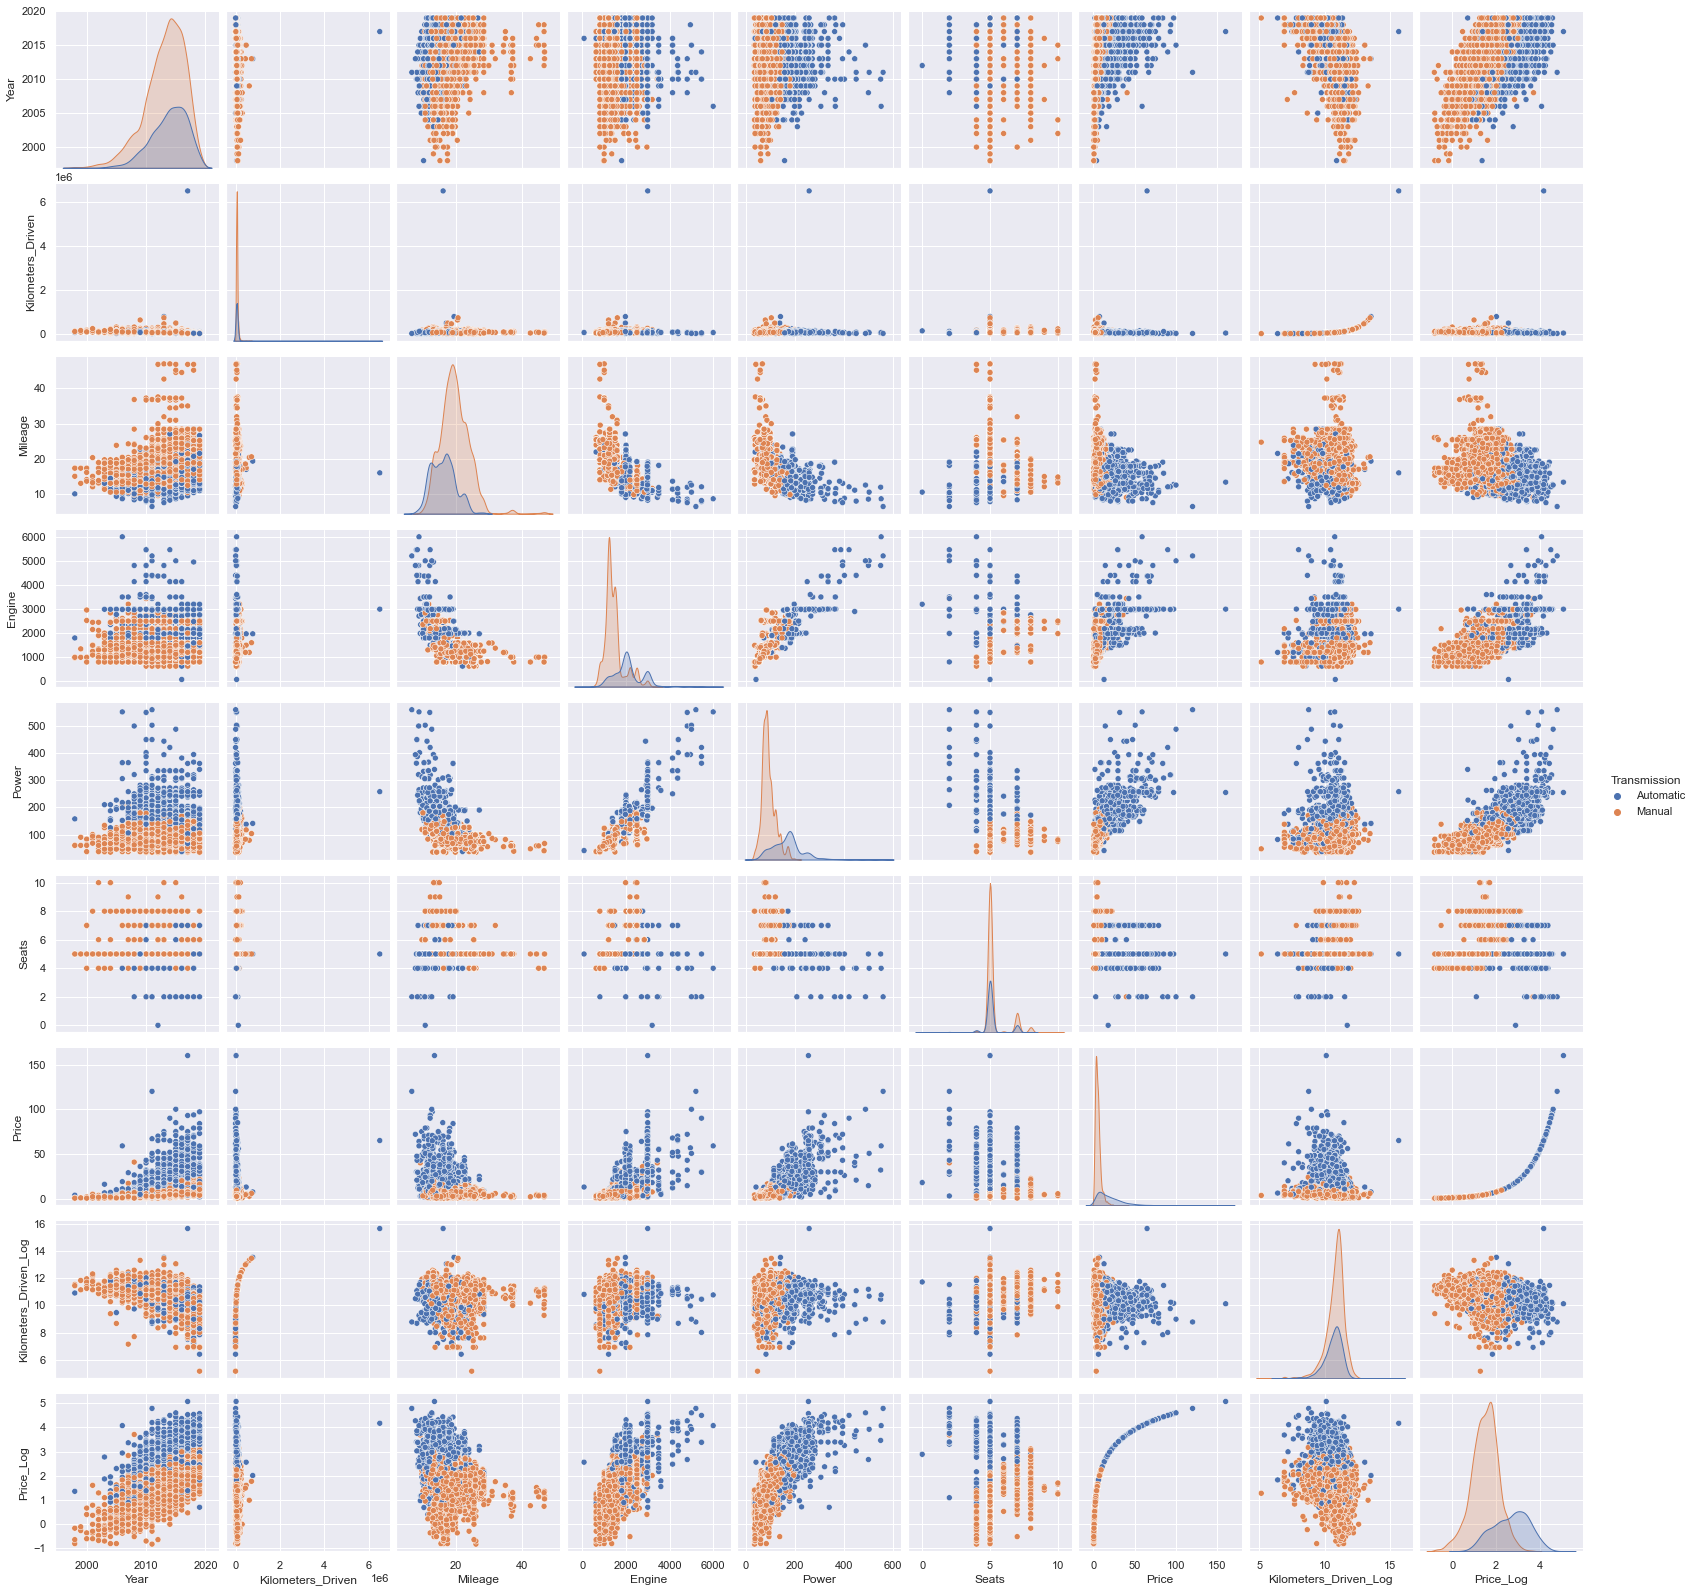

<IPython.core.display.Javascript object>

In [91]:
# Compare each numerical feature against each other
sns.pairplot(cars4u_data, hue="Transmission")

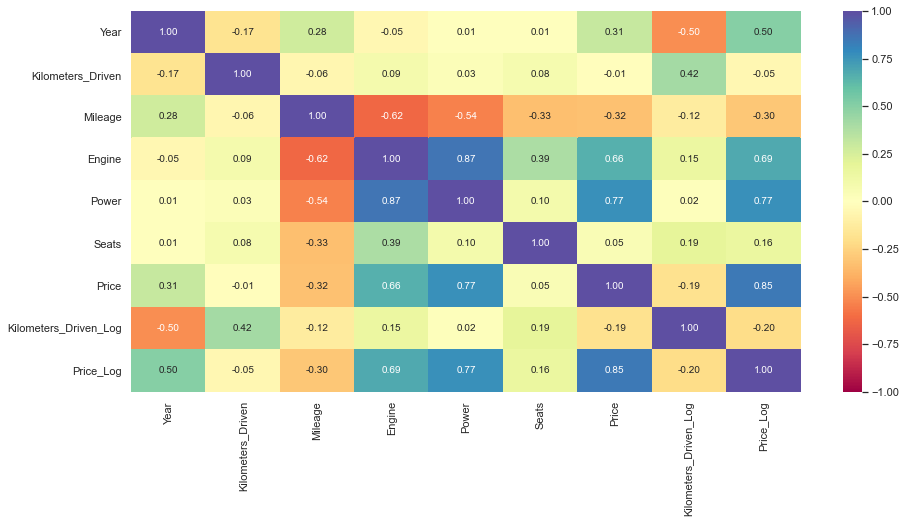

<IPython.core.display.Javascript object>

In [92]:
# Check heatmap for correlation
plt.figure(figsize=(15, 7))
sns.heatmap(cars4u_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation  on correlation between multiple variables:

1. There are higher positive correlation between below features:

    a) Engine and Power
    
    b) Price and Power
    
    c) Price and Engine
    

2. There are higher negative correlation between below features:

    a) Engine and Mileage
    
    b) Power and Mileage


#### A. Engine vs Power

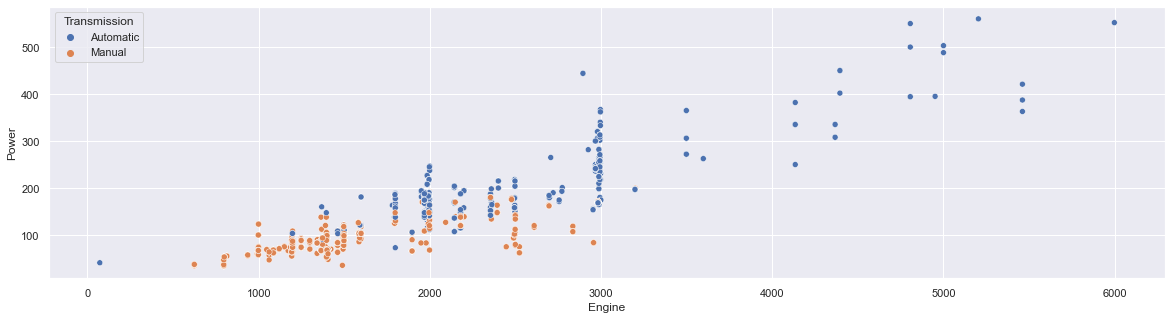

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Engine", y="Power", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Engine vs Power": 

1. Power increases as Engine size increases.
2. Automatic cars has higher Engine size and Power.

#### B. Engine vs Mileage

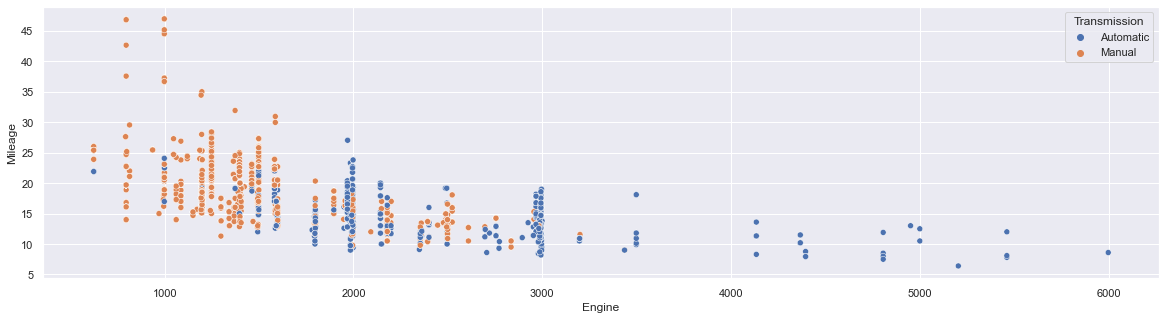

<IPython.core.display.Javascript object>

In [94]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Engine", y="Mileage", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Engine vs Mileage": 

1. Mileage decreases as Engine size increases.
2. Automatic cars has higher Engine size and lower mileage.

#### C. Power vs Mileage

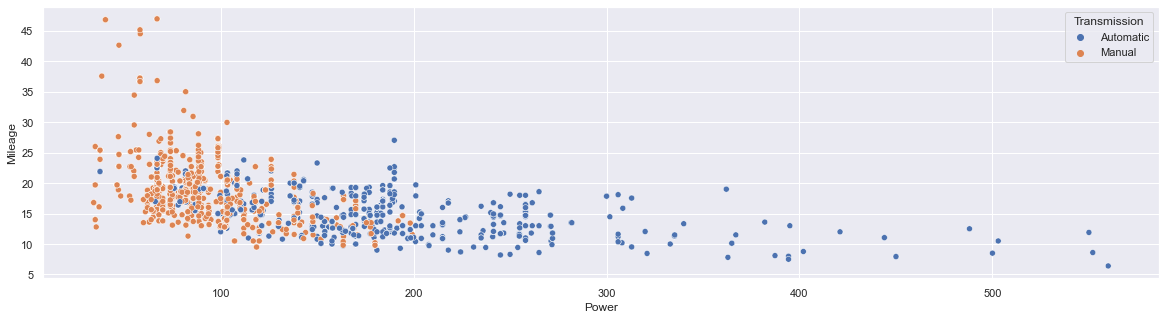

<IPython.core.display.Javascript object>

In [95]:
plt.figure(figsize=(20, 5))
sns.scatterplot(x="Power", y="Mileage", data=cars4u_data, hue="Transmission")
plt.show()

#### Observation  "Power vs Mileage": 

1. Mileage decreases as Power increases.
2. Automatic cars has higher Power and lower mileage.

#### D. Fuel Type vs Transmission

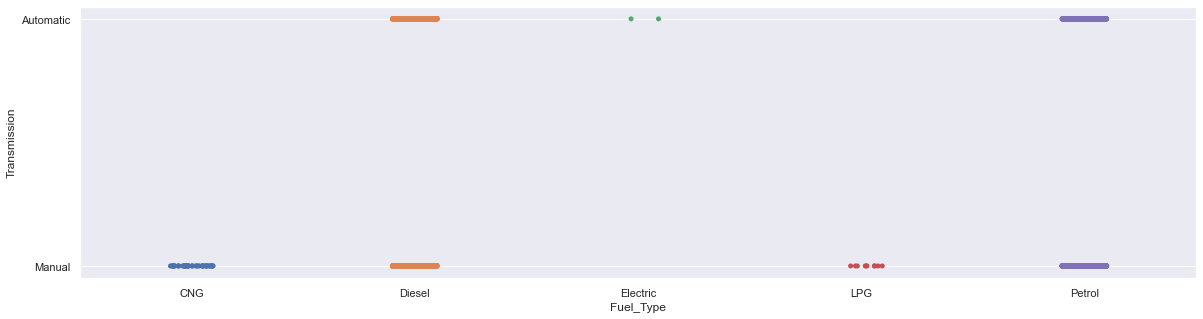

<IPython.core.display.Javascript object>

In [96]:
plt.figure(figsize=(20, 5))
sns.stripplot(x="Fuel_Type", y="Transmission", data=cars4u_data)
plt.show()

#### Observation  "Fuel Type vs Transmission": 

1. Fuel types CNG and LPG are not available for "Automatic" transmission cars.
2. Electric fuel type is available only for "Automatic" transmission cars.

#### E. Fuel Type vs Mileage

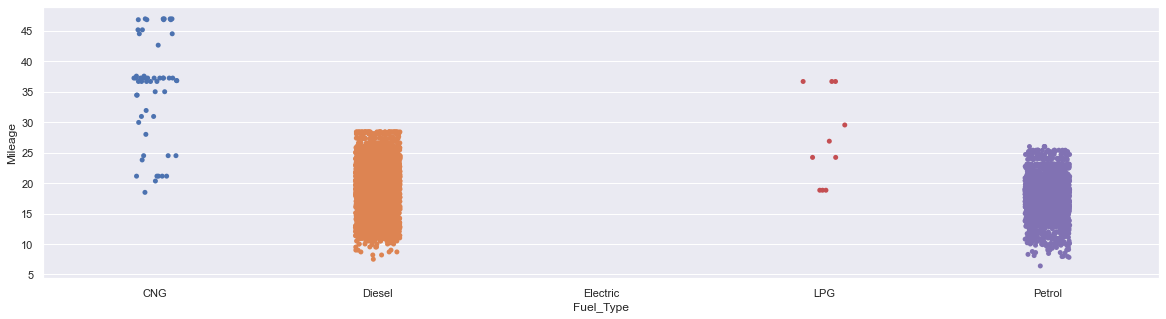

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(20, 5))
sns.stripplot(y="Mileage", x="Fuel_Type", data=cars4u_data)
plt.show()

#### Observation  "Fuel Type vs Mileage": 

1. Fuel types CNG and LPG cars are less. But, their mileage is higher compared to others.
2. Diesel cars has higher mileage compared to Petrol cars.

#### F. Mileage vs Transmission

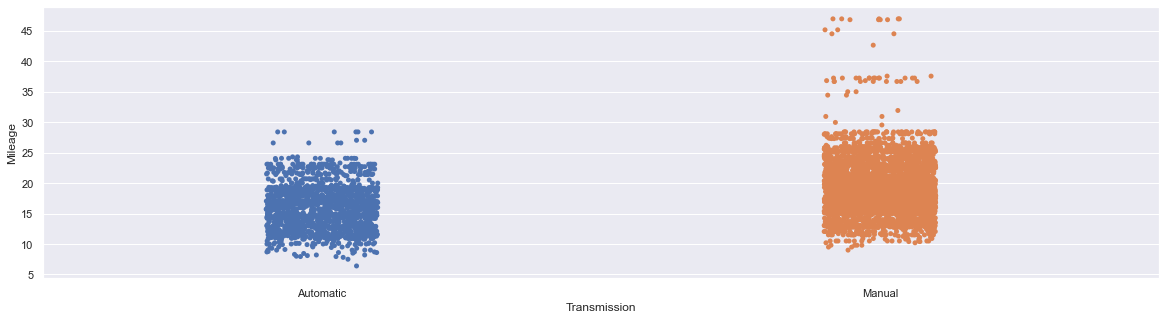

<IPython.core.display.Javascript object>

In [98]:
plt.figure(figsize=(20, 5))
sns.stripplot(y="Mileage", x="Transmission", data=cars4u_data)
plt.show()

#### Observation  "Mileage vs Transmission": 

1. Manual cars has higher mileage than Automatic cars.

#### G. Fuel Type vs Engine

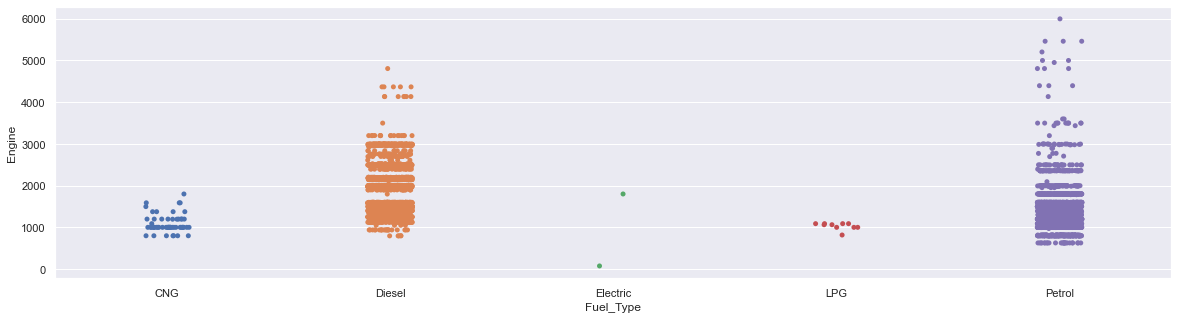

<IPython.core.display.Javascript object>

In [99]:
plt.figure(figsize=(20, 5))
sns.stripplot(y="Engine", x="Fuel_Type", data=cars4u_data)
plt.show()

#### Observation  "Fuel Type vs Engine": 

1. Fuel types CNG, Electric and LPG has lower Engine size. 
2. Diesel and Petrol has higher Engine size.

#### H. Kilometers Driven vs Car Brand

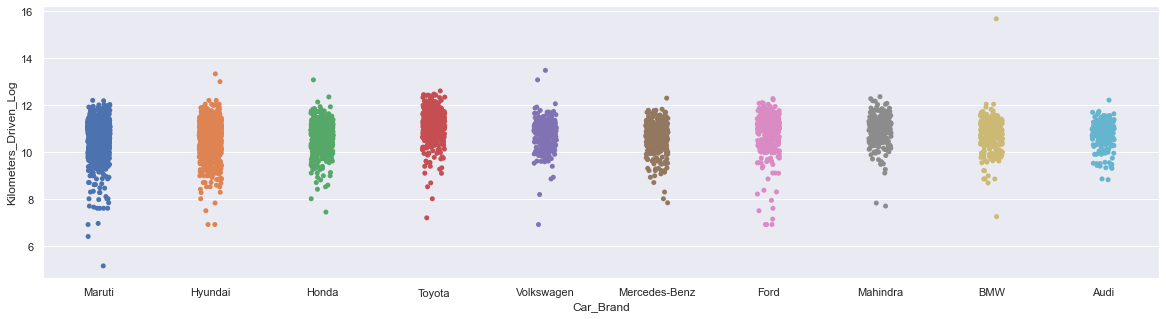

<IPython.core.display.Javascript object>

In [100]:
group_order = (
    cars4u_data.groupby("Car_Brand")["Kilometers_Driven_Log"]
    .sum()
    .sort_values(ascending=False)
    .index[:10]
)

plt.figure(figsize=(20, 5))
sns.stripplot(
    y="Kilometers_Driven_Log", x="Car_Brand", data=cars4u_data, order=group_order
)
plt.show()

#### Observation  "Kilometers Driven vs Car Brand": 

1. Maruti, Hyundai, Honda etc are mostly driven cars

### 11. Missing Value Treatment

In [101]:
# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,70,1.16,float64
Engine,36,0.60,float64
Power,143,2.38,float64
Seats,42,0.70,float64


<IPython.core.display.Javascript object>

In [102]:
# Fill null values with median value grouped by "Location","Year","Fuel_Type","Transmission","Owner_Type","Car_Brand","Car_Model"

cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    [
        "Location",
        "Year",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Car_Brand",
        "Car_Model",
    ]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,58,0.96,float64
Engine,32,0.53,float64
Power,123,2.04,float64
Seats,38,0.63,float64


<IPython.core.display.Javascript object>

In [103]:
# Fill null values with median value grouped by "Location","Year","Fuel_Type","Transmission","Car_Brand","Car_Model"

cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Location", "Year", "Fuel_Type", "Transmission", "Car_Brand", "Car_Model"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,53,0.88,float64
Engine,28,0.47,float64
Power,111,1.84,float64
Seats,33,0.55,float64


<IPython.core.display.Javascript object>

In [104]:
# Fill null values with median value grouped by "Location","Year","Fuel_Type","Car_Brand","Car_Model"


cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Location", "Year", "Fuel_Type", "Car_Brand", "Car_Model"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,53,0.88,float64
Engine,28,0.47,float64
Power,109,1.81,float64
Seats,33,0.55,float64


<IPython.core.display.Javascript object>

In [105]:
# Fill null values with median value grouped by "Location","Year","Car_Brand","Car_Model"

cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Location", "Year", "Car_Brand", "Car_Model"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,52,0.86,float64
Engine,25,0.42,float64
Power,96,1.59,float64
Seats,30,0.50,float64


<IPython.core.display.Javascript object>

In [106]:
# Fill null values with median value grouped by "Location","Car_Brand","Car_Model"


cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Location", "Car_Brand", "Car_Model"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,17,0.28,float64
Engine,3,0.05,float64
Power,20,0.33,float64
Seats,6,0.10,float64


<IPython.core.display.Javascript object>

In [107]:
# Fill null values with median value grouped by "Car_Brand","Car_Model"

cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Car_Brand", "Car_Model"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,9,0.15,float64
Engine,0,0.00,float64
Power,11,0.18,float64
Seats,3,0.05,float64


<IPython.core.display.Javascript object>

In [108]:
# Fill null values with median value grouped by "Car_Brand"

cars4u_data[["Mileage", "Engine", "Power", "Seats"]] = cars4u_data.groupby(
    ["Car_Brand"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.00,category
Year,0,0.00,int64
Kilometers_Driven,0,0.00,int64
Fuel_Type,0,0.00,category
Transmission,0,0.00,category
Owner_Type,0,0.00,category
Mileage,1,0.02,float64
Engine,0,0.00,float64
Power,1,0.02,float64
Seats,0,0.00,float64


<IPython.core.display.Javascript object>

In [109]:
# Fill null values with median value of columns "Mileage" and "Power" respectively

cars4u_data["Mileage"].fillna(cars4u_data["Mileage"].median(), inplace=True)
cars4u_data["Power"].fillna(cars4u_data["Power"].median(), inplace=True)

# Check null values
check_null_values()

,Null values,Percentage of Null values,Data Type
Location,0,0.0,category
Year,0,0.0,int64
Kilometers_Driven,0,0.0,int64
Fuel_Type,0,0.0,category
Transmission,0,0.0,category
Owner_Type,0,0.0,category
Mileage,0,0.0,float64
Engine,0,0.0,float64
Power,0,0.0,float64
Seats,0,0.0,float64


<IPython.core.display.Javascript object>

### 12. Outlier Detection

In [110]:
# Make a copy of data for outlier treatment
cars4u_data_no_outliers = cars4u_data.copy()
cars4u_data_SFS = cars4u_data.copy()

<IPython.core.display.Javascript object>

In [111]:
# Get list of numerical columns for outlier treatment

numeric_col_list = cars4u_data_no_outliers.select_dtypes(
    include=np.number
).columns.tolist()

# Check numerical column list
numeric_col_list

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price',
 'Kilometers_Driven_Log',
 'Price_Log']

<IPython.core.display.Javascript object>

In [112]:
# Create function to detect outliers 

def detect_outliers_iqr(data):
    """
    To deteck outliers

    data: dataframe
    """
    
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print('1st Quantile : ',q1,' 3rd Quantile : ',q3,'\n')
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print('Lower Whisker : ',lwr_bound,' Upper Whisker : ',upr_bound,'\n')
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers



<IPython.core.display.Javascript object>

#### A. Check Outliers for "Year"

In [113]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Year"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  2011.0  3rd Quantile :  2016.0 

Lower Whisker :  2003.5  Upper Whisker :  2023.5 

Outliers from IQR method:  [1998, 1998, 1998, 1998, 1999, 1999, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003, 2003]


<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### B. Check Outliers for "Kilometers_Driven"

In [114]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Kilometers_Driven"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  34000.0  3rd Quantile :  73000.0 

Lower Whisker :  -24500.0  Upper Whisker :  131500.0 

Outliers from IQR method:  [131765, 132000, 132000, 132000, 132000, 133000, 133000, 133944, 134000, 135000, 135000, 135000, 135000, 135000, 135000, 135000, 135000, 135670, 136000, 136000, 136490, 136642, 136997, 137000, 137000, 137000, 137008, 137148, 137800, 138000, 138000, 138000, 138000, 138205, 139000, 140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000, 140000, 141537, 142000, 142000, 143000, 143017, 143143, 143275, 143354, 144000, 144000, 144113, 144400, 144471, 145000, 145000, 145000, 145277, 146000, 146000, 146300, 146824, 147000, 147350, 147848, 147898, 148000, 148000, 148000, 148009, 149000, 149706, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150000, 150386, 151000, 152000, 152000, 152000, 152633, 153000, 154000, 155000, 155000, 155566, 156000, 156056, 156210, 156347, 157000, 158000, 158000, 15

<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### C. Check Outliers for "Mileage"

In [115]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Mileage"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  15.3  3rd Quantile :  21.1 

Lower Whisker :  6.6  Upper Whisker :  29.800000000000004 

Outliers from IQR method:  [6.4, 29.96, 30.94, 30.94, 31.92, 34.44, 34.44, 35.0, 35.0, 36.68, 36.68, 36.68, 36.68, 36.68, 36.68, 36.68, 36.68, 36.82, 36.82, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.24, 37.56, 37.56, 42.64, 44.51, 44.51, 45.16, 45.16, 46.82, 46.82, 46.82, 46.82, 46.96, 46.96, 46.96, 46.96, 46.96]


<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### D. Check Outliers for "Engine"

In [116]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Engine"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  1198.0  3rd Quantile :  1984.0 

Lower Whisker :  19.0  Upper Whisker :  3163.0 

Outliers from IQR method:  [3197.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3198.0, 3200.0, 3436.0, 3436.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3498.0, 3597.0, 3597.0, 4134.0, 4134.0, 4134.0, 4134.0, 4134.0, 4134.0, 4134.0, 4134.0, 4367.0, 4367.0, 4367.0, 4367.0, 4367.0, 4395.0, 4395.0, 4395.0, 4806.0, 4806.0, 4806.0, 4806.0, 4951.0, 5000.0, 5000.0, 5204.0, 5461.0, 5461.0, 5461.0, 5998.0]


<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### E. Check Outliers for "Power"

In [117]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Power"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  74.0  3rd Quantile :  138.1 

Lower Whisker :  -22.14999999999999  Upper Whisker :  234.25 

Outliers from IQR method:  [235.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235.0, 235.0, 236.0, 237.4, 240.0, 240.0, 241.0, 241.0, 241.0, 241.38, 241.38, 241.38, 241.38, 241.38, 241.38, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 241.4, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 245.0, 246.7, 246.7, 246.74, 250.0, 250.0, 254.0, 254.79, 254.79, 254.79, 254.79, 254.79, 254.79, 254.79, 254.79, 254.8, 254.8, 254.8, 254.8, 254.8, 254.8, 254.8, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 258.0, 2

<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### F. Check Outliers for "Seats"

In [118]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Seats"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  5.0  3rd Quantile :  5.0 

Lower Whisker :  5.0  Upper Whisker :  5.0 

Outliers from IQR method:  [0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0,

<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

#### G. Check Outliers for "Price"

In [119]:
sample_outliers = detect_outliers_iqr(cars4u_data_no_outliers["Price"])

print("Outliers from IQR method: ", sample_outliers)

1st Quantile :  3.5  3rd Quantile :  9.95 

Lower Whisker :  -6.174999999999999  Upper Whisker :  19.625 

Outliers from IQR method:  [19.64, 19.65, 19.75, 19.75, 19.75, 19.75, 19.8, 19.85, 19.86, 19.9, 19.9, 19.9, 19.92, 19.92, 19.94, 19.97, 19.99, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.04, 20.11, 20.12, 20.14, 20.25, 20.25, 20.26, 20.28, 20.37, 20.4, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.57, 20.67, 20.72, 20.75, 20.75, 20.77, 20.87, 20.99, 20.99, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.26, 21.33, 21.37, 21.42, 21.43, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.56, 21.6, 21.66, 21.67, 21.69, 21.73, 21.75, 21.75, 21.8, 21.9, 21.94, 21.95, 21.95, 21.99, 21.99, 21.99, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.2, 22.24, 22.25, 22.45, 22.5, 22.5, 22.5, 22.5, 22.5, 22.5, 22.55, 22.58, 22.75, 22.75, 22.75, 22.95, 22.99, 22.99, 22.99, 23.0, 23.0, 23.0, 23.0, 

<IPython.core.display.Javascript object>

#### Observation: 
1. Outlier values seems to be legitimate. No need to treat outliers.

In [120]:

def clip_outliers(data, colname):
    """
    Remove outliers from a column in a dataframe

    data: dataframe
    colname: dataframe column
    """

    Q1 = data[colname].quantile(0.25)
    Q3 = data[colname].quantile(0.75)
    IQR = Q3 - Q1
    Left_Whisker = Q1 - 1.5 * IQR
    Right_Whisker = Q3 + 1.5 * IQR
    data[colname] = np.clip(
        data[colname], Left_Whisker, Right_Whisker
    )  
    return data


for numeric_col in numeric_col_list:
    cars4u_data_no_outliers = clip_outliers(cars4u_data_no_outliers, numeric_col)


<IPython.core.display.Javascript object>

Univariate analysis for numeric column : Year




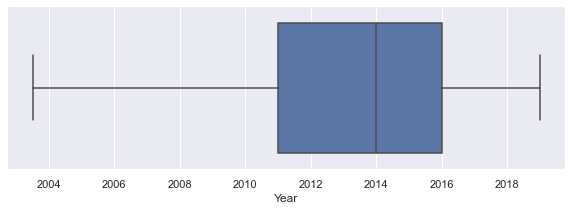




Univariate analysis for numeric column : Kilometers_Driven




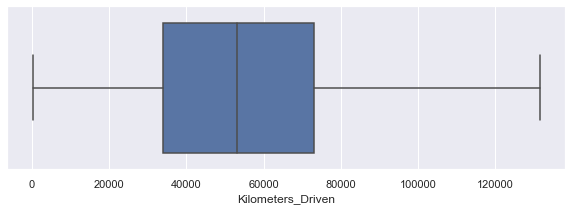




Univariate analysis for numeric column : Mileage




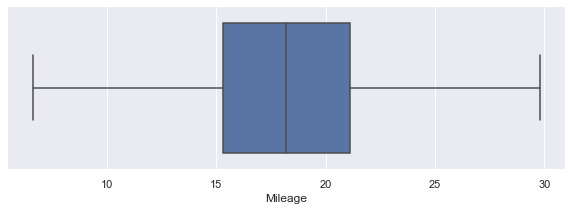




Univariate analysis for numeric column : Engine




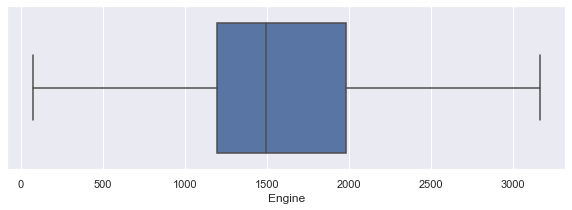




Univariate analysis for numeric column : Power




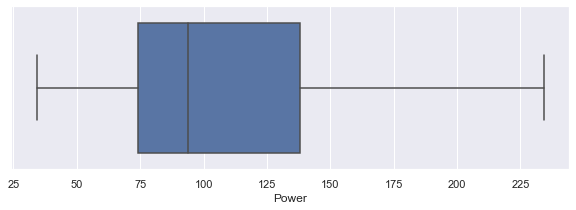




Univariate analysis for numeric column : Seats




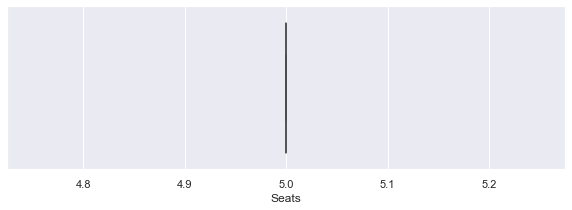




Univariate analysis for numeric column : Price




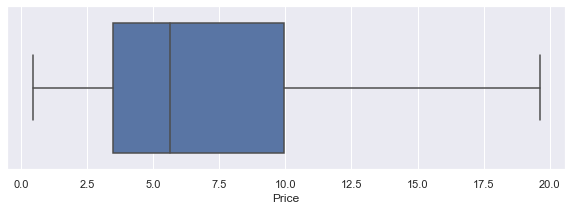




Univariate analysis for numeric column : Kilometers_Driven_Log




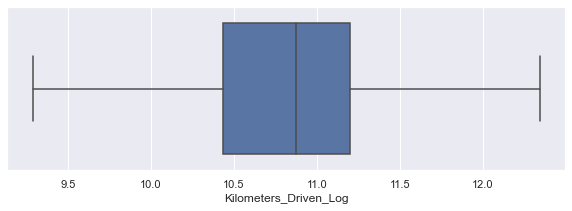




Univariate analysis for numeric column : Price_Log




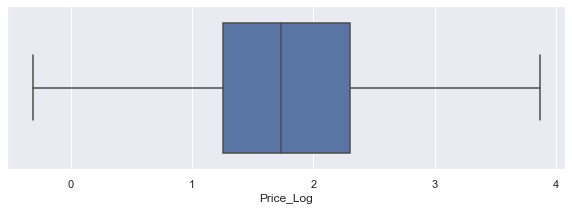

<IPython.core.display.Javascript object>

In [121]:
# Univariate analysis for numeric column

for colname in cars4u_data_no_outliers.dtypes[
    cars4u_data_no_outliers.dtypes != "category"
].index:
    # print(colname)
    print("Univariate analysis for numeric column :", colname)
    print("\n")
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=colname, data=cars4u_data_no_outliers)
    plt.show()
    print("\n\n")

#### Observation: 
1. Outlier values are removed.

### 13. One Hot Encoding - Categorical Variables

In [122]:
# One hot encoding for dataframe with outliers
cars4u_data = pd.get_dummies(
    cars4u_data,
    columns=[
        "Location",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Car_Brand",
        "Car_Model",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [123]:
cars4u_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Brand_Model_Group,Kilometers_Driven_Bin,Kilometers_Driven_Log,...,Car_Model_Xcent,Car_Model_Xenon,Car_Model_Xylo,Car_Model_Yeti,Car_Model_Z4,Car_Model_Zen,Car_Model_Zest,Car_Model_i10,Car_Model_i20,Car_Model_redi-GO
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,37.24,998.0,58.16,5.0,1.75,Maruti Wagon,70000 to 80000,11.184421,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta,40000 to 50000,10.621327,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,Honda Jazz,40000 to 50000,10.736397,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,Maruti Ertiga,80000 to 90000,11.373663,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,Audi A4,40000 to 50000,10.613246,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [124]:
# One hot encoding for dataframe without outliers
cars4u_data_no_outliers = pd.get_dummies(
    cars4u_data_no_outliers,
    columns=[
        "Location",
        "Fuel_Type",
        "Transmission",
        "Owner_Type",
        "Car_Brand",
        "Car_Model",
    ],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [125]:
cars4u_data_no_outliers.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Brand_Model_Group,Kilometers_Driven_Bin,Kilometers_Driven_Log,...,Car_Model_Xcent,Car_Model_Xenon,Car_Model_Xylo,Car_Model_Yeti,Car_Model_Z4,Car_Model_Zen,Car_Model_Zest,Car_Model_i10,Car_Model_i20,Car_Model_redi-GO
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010.0,72000,29.80,998.0,58.16,5.0,1.75,Maruti Wagon,70000 to 80000,11.184421,...,0,0,0,0,0,0,0,0,0,0
1,2015.0,41000,19.67,1582.0,126.20,5.0,12.50,Hyundai Creta,40000 to 50000,10.621327,...,0,0,0,0,0,0,0,0,0,0
2,2011.0,46000,18.20,1199.0,88.70,5.0,4.50,Honda Jazz,40000 to 50000,10.736397,...,0,0,0,0,0,0,0,0,0,0
3,2012.0,87000,20.77,1248.0,88.76,5.0,6.00,Maruti Ertiga,80000 to 90000,11.373663,...,0,0,0,0,0,0,0,0,0,0
4,2013.0,40670,15.20,1968.0,140.80,5.0,17.74,Audi A4,40000 to 50000,10.613246,...,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### 14. Linear Regression Model Building - with Outliers

In [126]:
# lets build our linear model
# independant variables
X_with_outliers = cars4u_data.drop(
    [
        "Price",
        "Price_Log",
        "Car_Brand_Model_Group",
        "Kilometers_Driven_Bin",
        "Kilometers_Driven",
    ],
    axis=1,
)
# the dependent variable
y_with_outliers = cars4u_data[["Price_Log"]]

<IPython.core.display.Javascript object>

In [127]:
# Split X and y into training and test set in 70:30 ratio

(
    X_train_with_outliers,
    X_test_with_outliers,
    y_train_with_outliers,
    y_test_with_outliers,
) = train_test_split(X_with_outliers, y_with_outliers, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [128]:
regression_model_with_outliers = LinearRegression()
regression_model_with_outliers.fit(X_train_with_outliers, y_train_with_outliers)

LinearRegression()

<IPython.core.display.Javascript object>

In [129]:
for idx, col_name in enumerate(X_train_with_outliers.columns):
    print(
        "The coefficient for {} is {}".format(
            col_name, regression_model_with_outliers.coef_[0][idx]
        )
    )

The coefficient for Year is 0.106102130907974
The coefficient for Mileage is 0.0009718302030256652
The coefficient for Engine is -0.00011499725361558549
The coefficient for Power is 0.0031104935862164423
The coefficient for Seats is -0.005241043646740801
The coefficient for Kilometers_Driven_Log is -0.07680931362395671
The coefficient for Location_Bangalore is 0.17719249439054158
The coefficient for Location_Chennai is 0.05792336280963159
The coefficient for Location_Coimbatore is 0.1474844773750279
The coefficient for Location_Delhi is -0.07936825264292771
The coefficient for Location_Hyderabad is 0.157353909225859
The coefficient for Location_Jaipur is -0.014528058712109387
The coefficient for Location_Kochi is -0.014239768295853883
The coefficient for Location_Kolkata is -0.21701239511132966
The coefficient for Location_Mumbai is -0.05728749032991075
The coefficient for Location_Pune is -0.017739947234593736
The coefficient for Fuel_Type_Diesel is 0.08216957840247918
The coefficient

<IPython.core.display.Javascript object>

In [130]:
pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,.5f}".format

coef_df_with_outliers = pd.DataFrame(
    np.append(
        regression_model_with_outliers.coef_, regression_model_with_outliers.intercept_
    ),
    index=X_train_with_outliers.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_with_outliers.sort_values(by=["Coefficients"], ascending=False)

,Coefficients
Car_Model_Mustang,1.36037
Car_Model_Santa,1.10252
Car_Model_Elantra,0.96108
Car_Model_Sonata,0.95588
Car_Brand_Lamborghini,0.95575
Car_Model_Gallardo,0.95575
Car_Model_Creta,0.95454
Car_Model_Tucson,0.90863
Car_Model_6,0.90578
Car_Model_X6,0.87924


<IPython.core.display.Javascript object>

In [131]:
regression_model_with_outliers.score(X_train_with_outliers, y_train_with_outliers)

0.9589297868301675

<IPython.core.display.Javascript object>

In [132]:


regression_model_with_outliers.score(X_test_with_outliers, y_test_with_outliers)



0.9588546916208409

<IPython.core.display.Javascript object>

### 15. Model Performance Evaluation - with Outliers

In [133]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to percentage error for MAPE
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res


# function to compute MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return (
        np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
    )


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [134]:
# Checking model performance on train set
print("Training Performance with outliers\n")
lin_reg_model_train_perf_with_outliers = model_performance_regression(
    regression_model_with_outliers, X_train_with_outliers, y_train_with_outliers
)
lin_reg_model_train_perf_with_outliers

Training Performance with outliers



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.17677,0.12387,0.95893,0.95618,12.69426


<IPython.core.display.Javascript object>

In [135]:
# Checking model performance on test set
print("Test Performance with outliers\n")
lin_reg_model_test_perf_with_outliers = model_performance_regression(
    regression_model_with_outliers, X_test_with_outliers, y_test_with_outliers
)
lin_reg_model_test_perf_with_outliers

Test Performance with outliers



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.17800,0.12813,0.95885,0.95181,12.91501


<IPython.core.display.Javascript object>

### 16. Linear Regression Model Building - without Outliers

In [136]:
# lets build our linear model
# independant variables
X_no_outliers = cars4u_data_no_outliers.drop(
    [
        "Price",
        "Price_Log",
        "Car_Brand_Model_Group",
        "Kilometers_Driven_Bin",
        "Kilometers_Driven",
    ],
    axis=1,
)
# the dependent variable
y_no_outliers = cars4u_data_no_outliers[["Price_Log"]]

<IPython.core.display.Javascript object>

In [137]:
# Split X and y into training and test set in 70:30 ratio

(
    X_train_no_outliers,
    X_test_no_outliers,
    y_train_no_outliers,
    y_test_no_outliers,
) = train_test_split(X_no_outliers, y_no_outliers, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [138]:
regression_model_no_outliers = LinearRegression()
regression_model_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

LinearRegression()

<IPython.core.display.Javascript object>

In [139]:
for idx, col_name in enumerate(X_train_no_outliers.columns):
    print(
        "The coefficient for {} is {}".format(
            col_name, regression_model_no_outliers.coef_[0][idx]
        )
    )

The coefficient for Year is 0.10506119458622407
The coefficient for Mileage is 0.0008350355004183197
The coefficient for Engine is -0.00013460973851944086
The coefficient for Power is 0.0035210476882878913
The coefficient for Seats is 702492520.2864977
The coefficient for Kilometers_Driven_Log is -0.09054123132495806
The coefficient for Location_Bangalore is 0.1785851943378326
The coefficient for Location_Chennai is 0.05840807304478082
The coefficient for Location_Coimbatore is 0.14857679865512904
The coefficient for Location_Delhi is -0.0769593445584178
The coefficient for Location_Hyderabad is 0.16180601716041565
The coefficient for Location_Jaipur is -0.012576289474964142
The coefficient for Location_Kochi is -0.01617354154586792
The coefficient for Location_Kolkata is -0.2153722159564495
The coefficient for Location_Mumbai is -0.055737704038619995
The coefficient for Location_Pune is -0.012998074293136597
The coefficient for Fuel_Type_Diesel is 0.07085734605789185
The coefficient f

<IPython.core.display.Javascript object>

In [140]:
pd.set_option("display.max_rows", None)
pd.options.display.float_format = "{:,.5f}".format

coef_df_no_outliers = pd.DataFrame(
    np.append(
        regression_model_no_outliers.coef_, regression_model_no_outliers.intercept_
    ),
    index=X_train_no_outliers.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df_no_outliers.sort_values(by=["Coefficients"], ascending=False)

,Coefficients
Seats,"702,492,520.28650"
Car_Model_Prius,"121,900,640.21839"
Car_Model_Continental,"56,796,919.42375"
Car_Brand_Isuzu,"43,246,880.77701"
Car_Model_One,"26,513,437.58607"
Car_Model_GO,"24,328,495.51536"
Car_Model_redi-GO,"24,328,495.32562"
Car_Model_Redi,"24,328,495.15293"
Car_Model_Boxster,"20,398,619.93691"
Car_Model_Gallardo,"18,671,872.28808"


<IPython.core.display.Javascript object>

In [141]:
regression_model_no_outliers.score(X_train_no_outliers, y_train_no_outliers)

0.9591765495726213

<IPython.core.display.Javascript object>

In [142]:

regression_model_no_outliers.score(X_test_no_outliers, y_test_no_outliers)



-16188098218189.385

<IPython.core.display.Javascript object>

### 17. Model Performance Evaluation - without Outliers

In [143]:
# Checking model performance on train set
print("Training Performance without outliers\n")
lin_reg_model_train_perf_no_outliers = model_performance_regression(
    regression_model_no_outliers, X_train_no_outliers, y_train_no_outliers
)
lin_reg_model_train_perf_no_outliers

Training Performance without outliers



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.17318,0.12218,0.95918,0.95645,12.75743


<IPython.core.display.Javascript object>

In [144]:
# Checking model performance on test set
print("Test Performance without outliers\n")
lin_reg_model_test_perf_no_outliers = model_performance_regression(
    regression_model_no_outliers, X_test_no_outliers, y_test_no_outliers
)
lin_reg_model_test_perf_no_outliers

Test Performance without outliers



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,"3,486,336.27823","145,639.18150","-16,188,098,218,189.38477","-18,961,399,924,615.25000","13,819,206.61873"


<IPython.core.display.Javascript object>

#### Observation: 
1. Performance of model without outliers data is very bad. So its advisable to use model with outliers data.

### 18. Insights

**Insights on each columns are listed below:**

**1. S.No.(Serial number) :** This column was unique. So made this index column.

**2. Name (Name of the car which includes brand name and model name) :** This feature contains car brand name, car model name and some other information. So car brand and model were extracted from this feature for model building. "Maruti" is most sold car brand with 1211 sales, followed by "Hyundai", "Honda", "Toyota" etc with 1107, 608, 411 respectively. "Maruti Swift" is most sold car model with 353 sales, followed by "Honda City", "Hyundai i20", "Hyundai Verna" etc with 270,247,170 respectively.

**3. Location (Location in which the car is being sold or is available for purchase (cities)) :** Location "Mumbai" has most number of car sales with 790. Then "Hyderabad" and "Kochi" are in 2nd and 3rd place with 742 and 651 respectively.

**4. Year (Manufacturing year of the car) :** The distribution of this feature looks normal. It is left skewed with outliers. However, outlier values seems to be legitimate. So outlier treatment is not required. The mean value is 2013 and median value is 2014.

**5. Kilometers_driven (The total kilometers driven in the car by the previous owner(s) in km) :** The distribution of this feature doesn't look like a normal distribution. It is heavily right skewed and has outliers. So log transformation was applied for a normal distribution. Outliers values seems to be legitimate. So outlier treatment is not required.


**6. Fuel_Type (The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)) :** "Diesel" cars are sold most with 3205 sales. Petrol cars are second most sold with 2746 sales. CNG, LPG and Electric car sales are very less.

**7. Transmission (The type of transmission used by the car (Automatic/Manual)) :** Manual cars are sold the most with 4299 sales. Automatic cars are next with 1720 sales. 

**8. Owner (Type of ownership) :** There are four kinds of ownership "First", "Second", "Third" and "Fourth & Above". "First" cars are sold the most with 4929 sales. Then comes "Second", "Third" and "Fourth & Above" with 968, 113 and 9 car sales respectively.

**9. Mileage (The standard mileage offered by the car company in kmpl or km/kg) :** This feature was converted to numerical values for model building. The distribution of this feature looks normal. It is not much skewed and it has outliers. However, outliers values seems to be legitimate. Mean is 18.45 and median is 18.23. Missing values were imputed with median values.

**10. Engine (The displacement volume of the engine in CC) :** This feature was converted to numerical values for model building. The distribution of this feature looks normal. It is slightly right skewed and has outliers. However, outliers values seems to be legitimate. Mean is 1621.27 and median is 1493.00. Missing values were imputed with median values.

**11. Power (The maximum power of the engine in bhp) :** This feature was converted to numerical values for model building. The distribution of this feature looks normal. It is heavily right skewed and has outliers. However, outliers values seems to be legitimate. Mean is 113.25 and median is 97.70. Missing values were imputed with median values.

**12. Seats (The number of seats in the car) :** The distribution of this feature looks normal. It has outliers, but, they looks legitimate. Mean is 5.27 and median is 5. Missing values were imputed with median values.

**13. New_Price (The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)) :** Percentage of null values is very high (86.13%) in column "New_Price". Missing value imputation will not fix this because there is not enough data under this column. This column will not help in model building. So this feature was dropped and not considered in linear regression model building.

**14. Price (The price of the used car in INR Lakhs) :** This is the target variable (predictor variable). It had 17% missing values. Target variable cannot have null data as it will impact model building. So missing values were dropped. The distribution of this feature doesn't look normal. It is heavily right skewed and has outliers. However, outliers values seems to be legitimate. Mean is 9.47 Lakhs and median is 5.64 Lakhs. This feature  requires log transformation. **One of the assumptions of a linear regression model is "Normality" (For any fixed value of X, Y is normally distributed). Since "Price" is heavily right skewed, log transformation was applied. One important point is to apply inverse function of log transformation for predicted values to get actual predicted target value.**

**Other Insights :**

1. Power increases as Engine size increases.
2. Automatic cars has higher Engine size and Power.
3. Mileage decreases as Engine size increases.
4. Automatic cars has higher Engine size and lower mileage.
5. Mileage decreases as Power increases.
6. Automatic cars has higher Power and lower mileage.
7. Fuel types CNG and LPG are not available for "Automatic" transmission cars.
8. Electric fuel type is available only for "Automatic" transmission cars.
9. Fuel types CNG and LPG cars are less. But, their mileage is higher compared to others.
10. Diesel cars has higher mileage compared to Petrol cars.
11. Manual cars has higher mileage than Automatic cars.
12. Fuel types CNG, Electric and LPG has lower Engine size.
13. Diesel and Petrol has higher Engine size.
14. Maruti, Hyundai, Honda etc are mostly driven cars


### 19. Recommendations

**A. Linear Regression Model :** Model is able to get R2 score of 0.96 in both Test and Train data. It shows model is able to explain 96% of both Train and Test data. Data manipulation was required for features "Mileage", "Engine" and "Power". Log transformation was required on "Kilometers Driven" and "Price". Missing value treatment was done for "Mileage", "Engine", "Power", "Seats" with median values. Model performance evaluation is shown below:

1) Training Data: 

    Root Mean Square Error (RMSE) : 0.17677 
    Mean Absolute Error (MAE) : 0.12387 
    R Squared Score : 0.95893 
    Adjusted R Squared Score : 0.95618 
    Mean Absolute Percentage Error : 12.69426 
    
2) Test Data: 

    Root Mean Square Error (RMSE) : 0.17800 
    Mean Absolute Error (MAE) : 0.12813 
    R Squared Score : 0.95885 
    Adjusted R Squared Score : 0.95181 
    Mean Absolute Percentage Error : 12.91501


**B. Market & target more in below customer preferences :**

   1) Customers in Coimbatore spends a lot on car prices. Followed by Bangalore and Kochi. Target these locations for sales.
   
   2) Newer year cars have higher prices. Looks like customers prefer newer cars.
   
   3) Most of the car were driven for less than 10000 kms. Price trends to drop when kilometers driven  increases.This downward trend is distinguishable based on Fuel Type. Shows customers prefer cars driven less.
   
   4) Average highest price is for "Diesel" and "Electric" cars. This shows customers prefer cars based on its fuel consumption expense. Both Diesel and Electric cars cost less fuel expense compared to other (Especially, "Petrol" is costlier than "Diesel" and "Electric").
   
   5) "Automatic" cars are priced higher than "Manual" cars. Its because automatic cars are more comfortable to drive compared to manual ones.
   
   6) "First" owner type cars are priced higher. Then comes "Second", "Third" and "Fourth & Above". Probably because customers prefer less number of previous owners for cars.
   
   7) As engine size increases price also increases. "Automatic" cars has higher engine capacity and are priced higher than "Manual" cars.
   
   8) As power increases price also increases. "Automatic" cars has higher power and are priced higher than "Manual" cars.
   
   9) There is high density of cars with seats "5" and "7". Probably they are hatcbacks, sedans and SUV's. 4. Cars with "2" seats seems to be higher priced. Probably they are sports cars.
   
   10) "Lamborghini", "Bentley", "Porsche" etc seems to be higher priced car brands.
   
   11) "Lamborghini Gallardo", "Jaguar F", "Mercedes-Benz SLC" etc seems to be higher priced car models.
   
